In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Aditi\Documents\ArkaShine\values.csv")

In [3]:
df.head()

A(410)   B(435)   C(460)   D(485)   E(510)   F(535)  G(560)  H(585)  \
0  2429.58  1108.99  2091.93   737.33   835.14  1376.82  322.87  318.87   
1  1707.90   725.38  1974.49   670.81   835.93  1685.28  370.31  373.60   
2  1750.41  1102.02  2481.05   816.80   960.65  1741.43  430.51  437.88   
3  2546.68  1548.40  2791.56  1007.16  1128.00  1573.73  488.66  499.63   
4  3090.54  1266.42  2933.88   940.61  1109.84  2047.64  500.91  512.70   

    R(610)  I(645)  ...  P   (kg/ha)  K (kg/ha)  Ca (meq/100g)  Mg (meq/100g)  \
0  1305.33  163.26  ...        26.10     444.00           6.14           2.32   
1  1335.77  185.56  ...        81.99     372.00           5.98           0.50   
2  1206.99  227.04  ...        80.59     132.00           3.15           2.49   
3  1338.11  261.84  ...        33.81     221.76           3.40           1.90   
4  1482.11  267.19  ...        38.19     234.08           6.60           5.20   

   S (ppm)  Fe (ppm)  Mn (ppm)  Cu (ppm)  Zn (ppm)  B (ppm)  
0    11.21      3.08     14.10      2.23      0.84     1.22  
1    12.93     47.74     37.63      3.28      6.79     1.13  
2     5.17     14.96     44.53      1.22      1.21     0.98  
3    11.59      6.38     10.62      1.77      0.99     0.27  
4    34.10     14.08      3.56      1.56      0.40     0.77  

[5 rows x 31 columns]

# Data PreProcessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A(410)         99 non-null     float64
 1   B(435)         99 non-null     float64
 2   C(460)         99 non-null     float64
 3   D(485)         99 non-null     float64
 4   E(510)         99 non-null     float64
 5   F(535)         99 non-null     float64
 6   G(560)         99 non-null     float64
 7   H(585)         99 non-null     float64
 8   R(610)         99 non-null     float64
 9   I(645)         99 non-null     float64
 10  S(680)         99 non-null     float64
 11  J(705)         99 non-null     float64
 12  U(760)         99 non-null     float64
 13  V(810)         99 non-null     float64
 14  W(860)         99 non-null     float64
 15  K(900)         99 non-null     float64
 16  L(940)         99 non-null     float64
 17  T(730)         99 non-null     float64
 18  pH         

In [5]:
df.isna().sum() #checking for the null Values

A(410)           1
B(435)           1
C(460)           1
D(485)           1
E(510)           1
F(535)           1
G(560)           1
H(585)           1
R(610)           1
I(645)           1
S(680)           1
J(705)           1
U(760)           1
V(810)           1
W(860)           1
K(900)           1
L(940)           1
T(730)           1
pH               5
EC  (dS/m)       5
OC (%)           5
P   (kg/ha)      5
K (kg/ha)        5
Ca (meq/100g)    8
Mg (meq/100g)    5
S (ppm)          5
Fe (ppm)         5
Mn (ppm)         5
Cu (ppm)         5
Zn (ppm)         5
B (ppm)          5
dtype: int64

In [6]:
#Descriptive Statistics of the data
df.describe().T

count         mean         std     min       25%      50%  \
A(410)          99.0  2163.039798  613.052886  642.74  1819.365  2098.23   
B(435)          99.0  1015.779354  220.398645  256.27   899.895  1016.33   
C(460)          99.0  2471.640101  455.244317  964.36  2167.565  2393.45   
D(485)          99.0   744.820303  274.814008  217.34   637.945   687.89   
E(510)          99.0   963.049697  163.991707   88.03   896.605   983.54   
F(535)          99.0  1475.602222  360.414184  736.70  1204.780  1352.12   
G(560)          99.0   398.516061   63.644213  192.25   361.575   391.27   
H(585)          99.0   415.789899  121.256245  215.18   373.100   399.71   
R(610)          99.0  1132.656061  270.599597  193.59   952.950  1135.58   
I(645)          99.0   205.911919   45.414860   30.11   185.560   207.12   
S(680)          99.0   268.896667   78.757163   63.96   226.855   275.10   
J(705)          99.0    65.112828   30.285386   34.73    54.220    60.12   
U(760)          99.0    70.596061   33.978194   37.88    56.815    67.20   
V(810)          99.0   196.322828   43.504780  114.52   164.460   176.52   
W(860)          99.0   243.576566   63.744657   51.10   208.930   231.98   
K(900)          99.0    89.688687   19.784963   34.14    75.645    85.30   
L(940)          99.0    44.154545    7.795650   23.18    39.260    41.08   
T(730)          99.0    81.095556   25.046834   50.75    71.455    79.53   
pH              95.0     7.108526    1.333953    4.73     6.050     7.07   
EC  (dS/m)      95.0     0.225368    0.297195    0.02     0.070     0.14   
OC (%)          95.0     0.660832    0.337442    0.09     0.410     0.60   
P   (kg/ha)     95.0    26.462211   20.827711    2.45    10.080    21.72   
K (kg/ha)       95.0   317.898842  195.398644   36.51   166.320   271.04   
Ca (meq/100g)   92.0    13.420652   15.071319    0.90     4.000     6.80   
Mg (meq/100g)   95.0     4.818105    4.745998    0.50     2.030     3.10   
S (ppm)         95.0    18.130526   12.187861    1.90    10.900    15.75   
Fe (ppm)        95.0    22.526632   28.834874    0.17     4.010    12.86   
Mn (ppm)        95.0    17.809158   16.499885    0.51     5.370    13.07   
Cu (ppm)        95.0     2.308421    2.000885    0.20     1.165     1.77   
Zn (ppm)        95.0     1.106105    0.897627    0.11     0.570     0.80   
B (ppm)         95.0     0.664316    0.289128    0.05     0.450     0.67   

                    75%      max  
A(410)         2410.930  3820.02  
B(435)         1109.985  1820.42  
C(460)         2749.005  3658.38  
D(485)          859.760  2977.66  
E(510)         1064.050  1394.80  
F(535)         1860.095  2241.63  
G(560)          442.045   567.56  
H(585)          445.700  1427.09  
R(610)         1344.550  1992.54  
I(645)          228.155   343.87  
S(680)          332.190   517.35  
J(705)           70.315   341.11  
U(760)           74.950   312.22  
V(810)          241.060   299.65  
W(860)          301.290   482.06  
K(900)          100.995   156.00  
L(940)           50.210    72.12  
T(730)           85.450   261.14  
pH                8.275     9.41  
EC  (dS/m)        0.250     2.23  
OC (%)            0.890     1.58  
P   (kg/ha)      37.315    81.99  
K (kg/ha)       422.340   804.00  
Ca (meq/100g)    16.000    74.50  
Mg (meq/100g)     5.250    25.80  
S (ppm)          23.035    82.93  
Fe (ppm)         30.845   157.45  
Mn (ppm)         23.610    76.30  
Cu (ppm)          2.515    10.38  
Zn (ppm)          1.475     6.79  
B (ppm)           0.845     1.34

In [7]:
df.duplicated().sum()

0

In [8]:
#treating the null values
#Since all are numerical data, we can use mean as the measure the replace all the misisng values
if df.isnull().values.any():
    # Calculate mean for numeric columns only
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Change non-numeric values to numeric values
df = df.apply(pd.to_numeric, errors='coerce')
#coerce- tells the function to convert non-numeric values to NaN if they cannot be converted to a numeric type. 

In [9]:
df.isna().sum() #all null values are filled with the mean value

A(410)           0
B(435)           0
C(460)           0
D(485)           0
E(510)           0
F(535)           0
G(560)           0
H(585)           0
R(610)           0
I(645)           0
S(680)           0
J(705)           0
U(760)           0
V(810)           0
W(860)           0
K(900)           0
L(940)           0
T(730)           0
pH               0
EC  (dS/m)       0
OC (%)           0
P   (kg/ha)      0
K (kg/ha)        0
Ca (meq/100g)    0
Mg (meq/100g)    0
S (ppm)          0
Fe (ppm)         0
Mn (ppm)         0
Cu (ppm)         0
Zn (ppm)         0
B (ppm)          0
dtype: int64

# Checking for outliers

In [10]:
c=df.columns
#outliers should be checked only for the numeric data
print(c)

Index(['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
       'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)', 'V(810)',
       'W(860)', 'K(900)', 'L(940)', 'T(730)', 'pH', 'EC  (dS/m)', 'OC (%)',
       'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)',
       'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'],
      dtype='object')


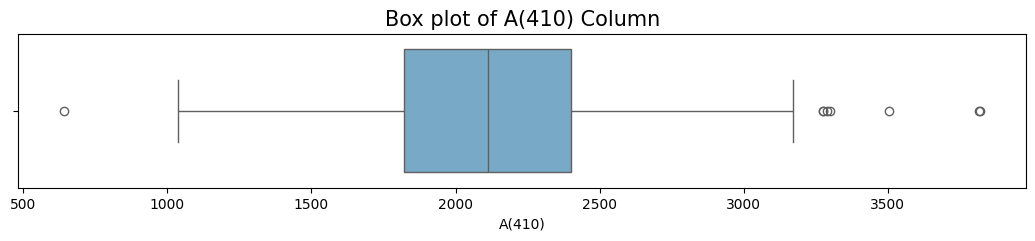

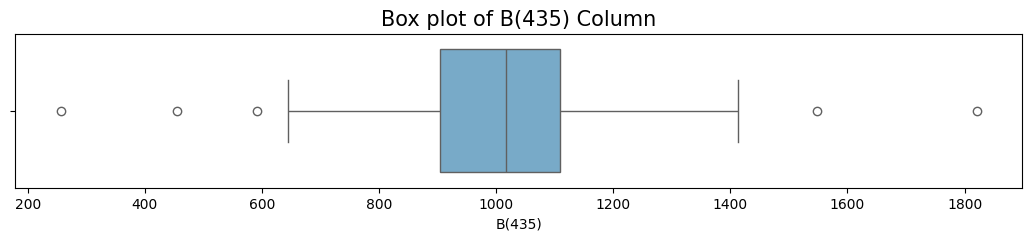

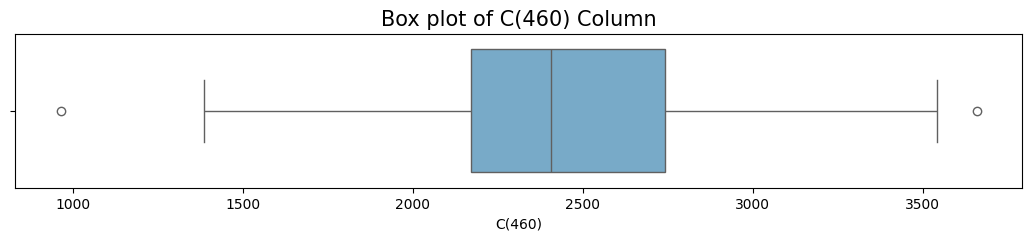

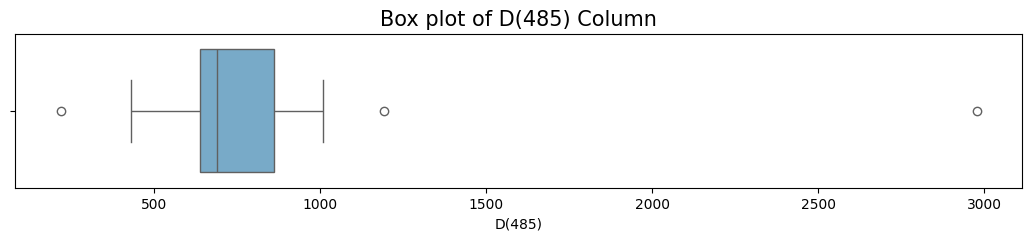

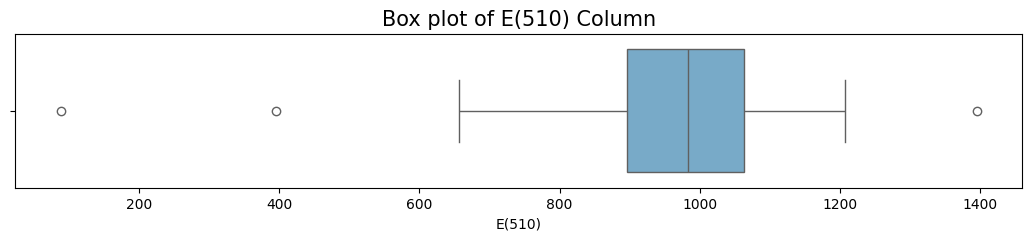

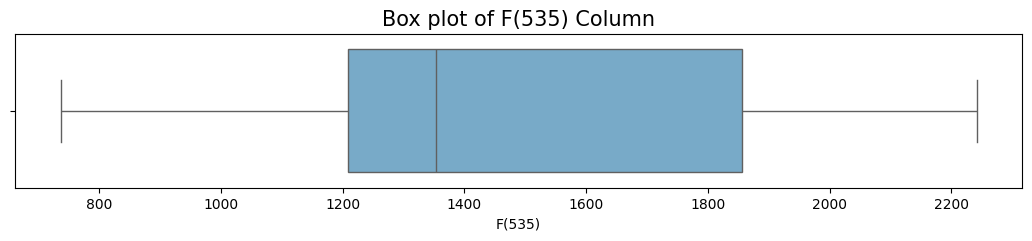

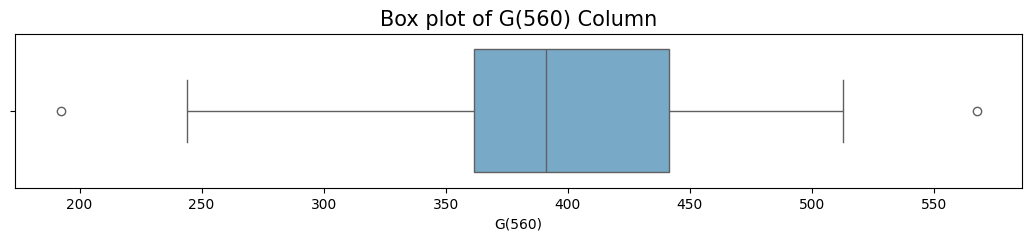

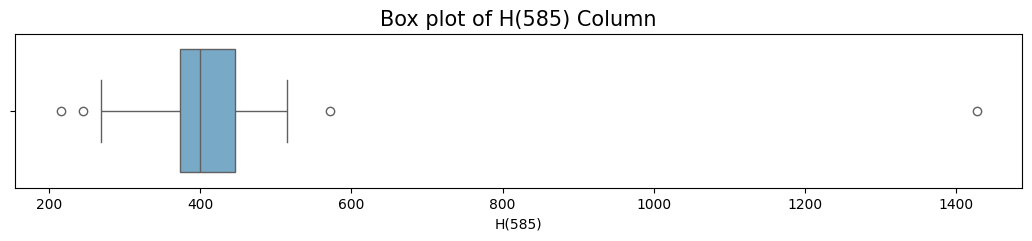

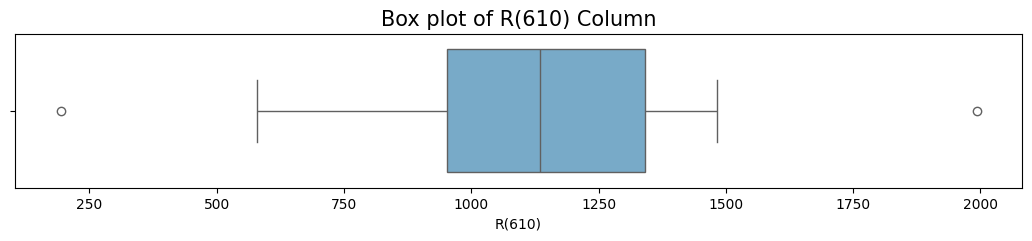

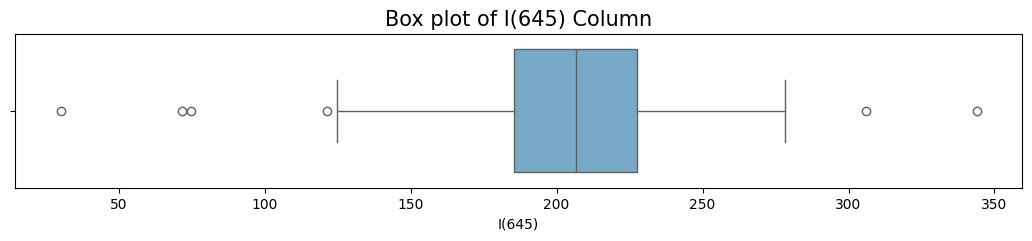

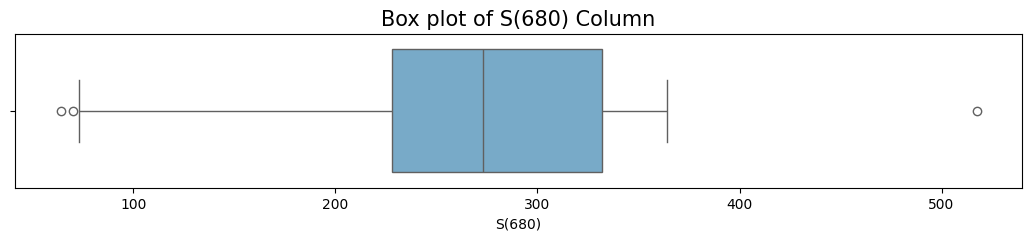

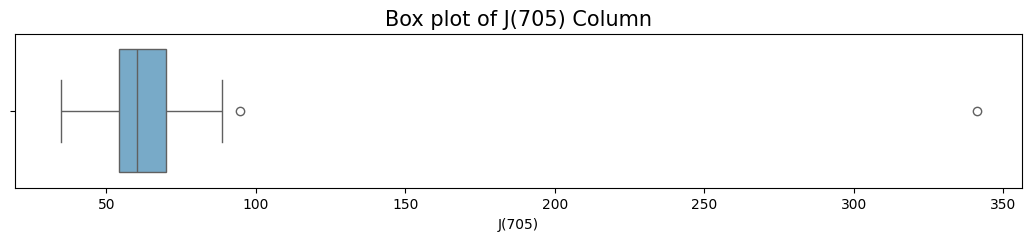

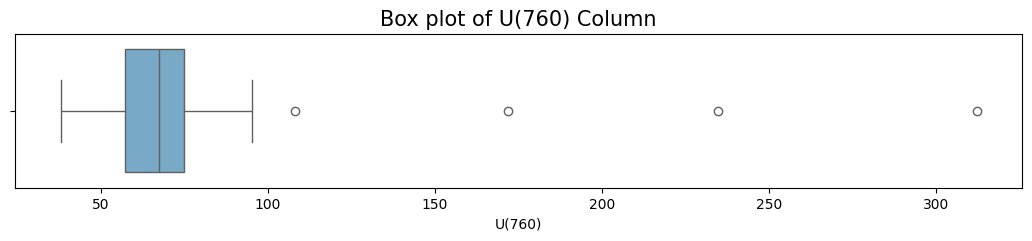

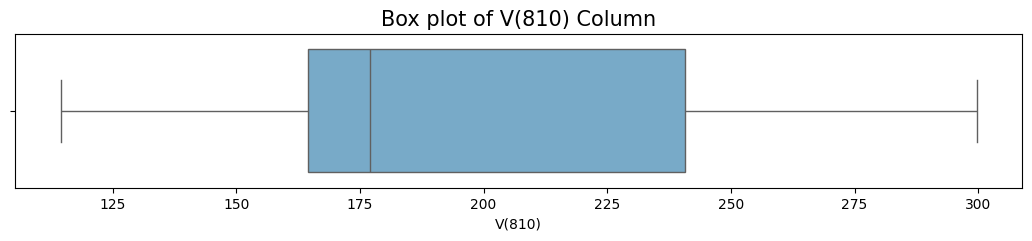

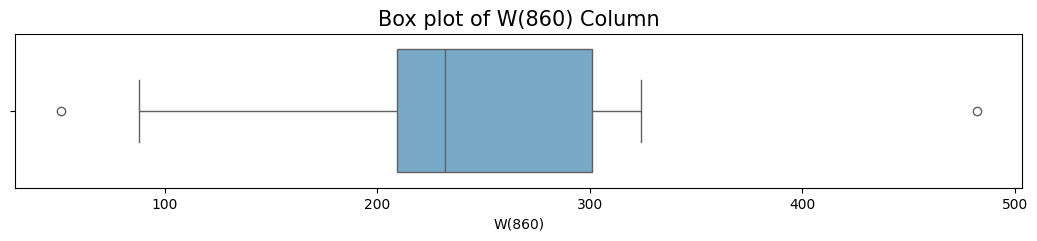

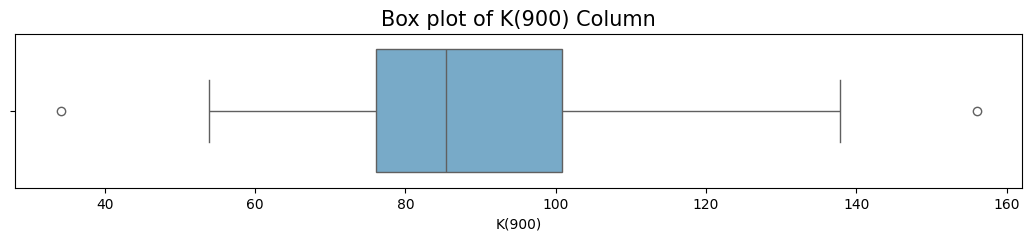

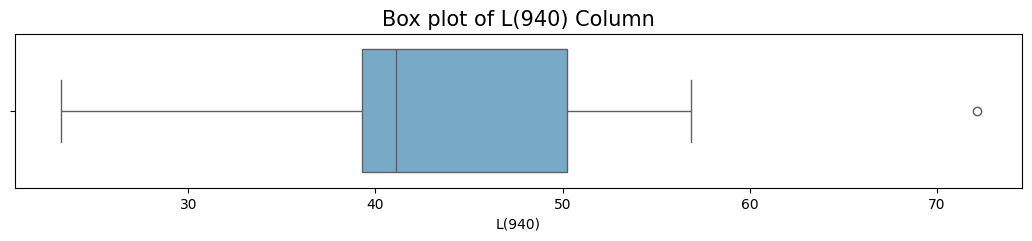

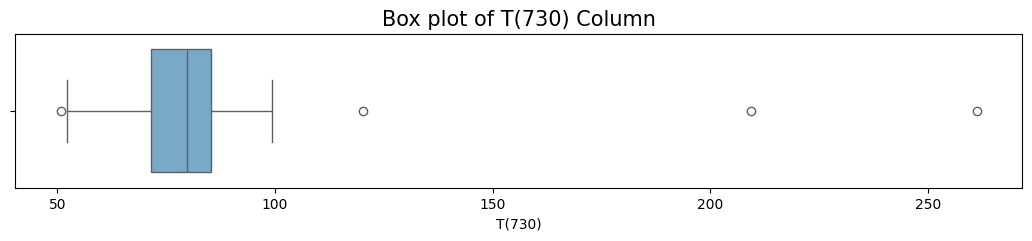

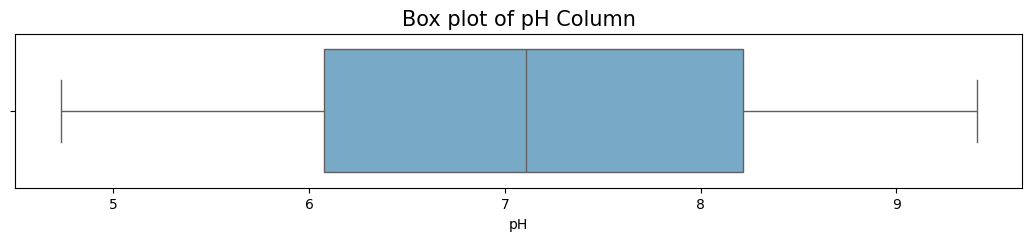

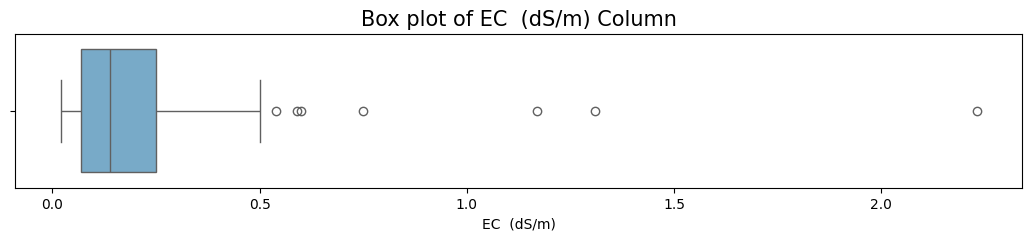

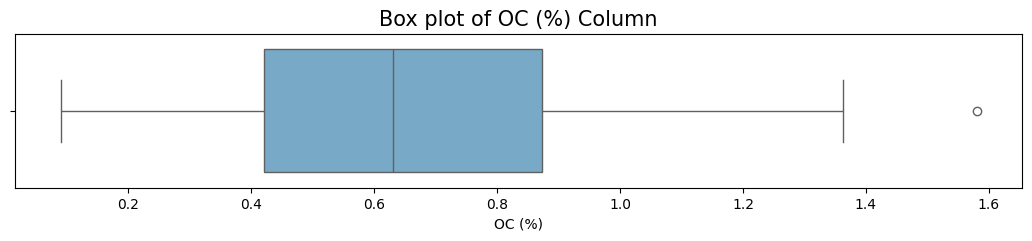

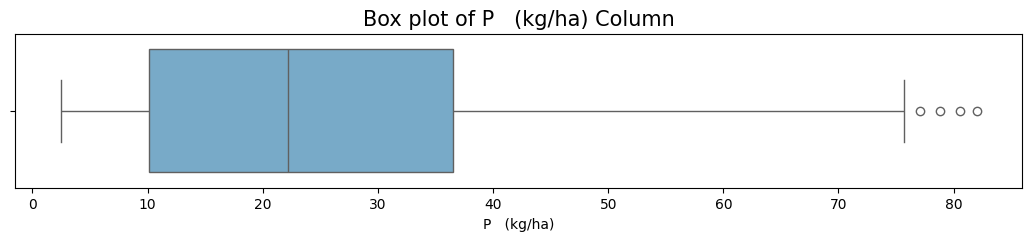

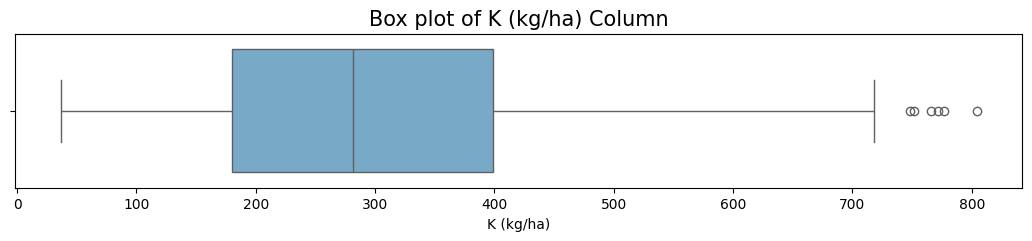

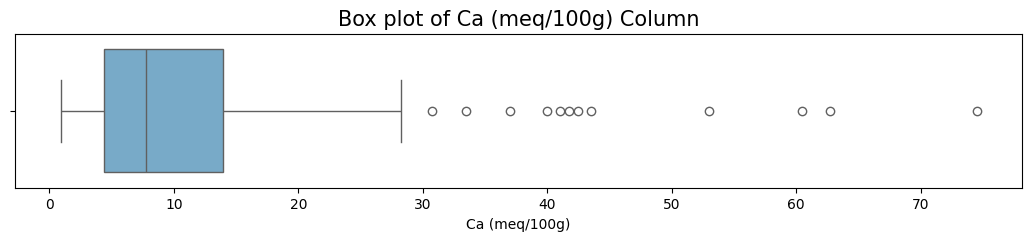

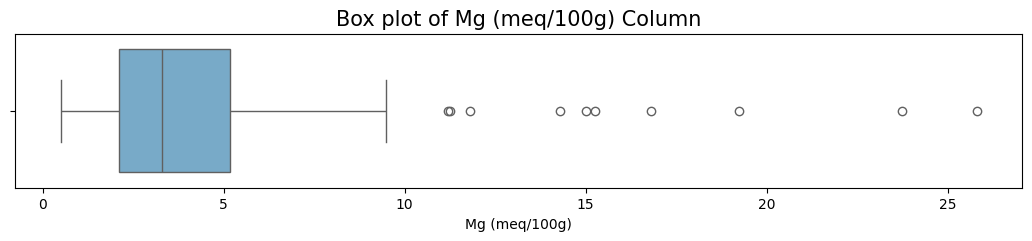

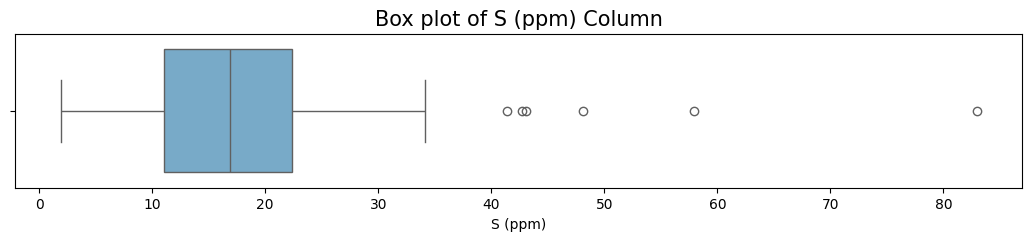

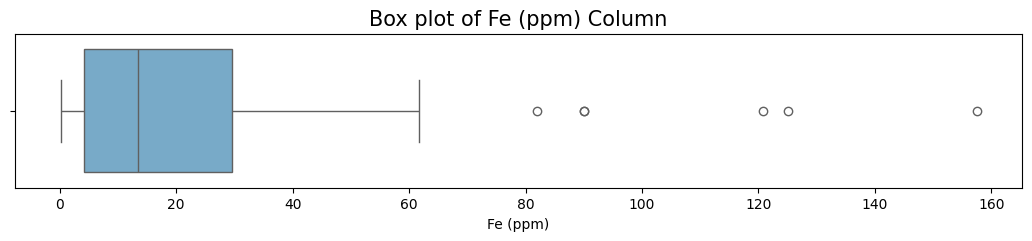

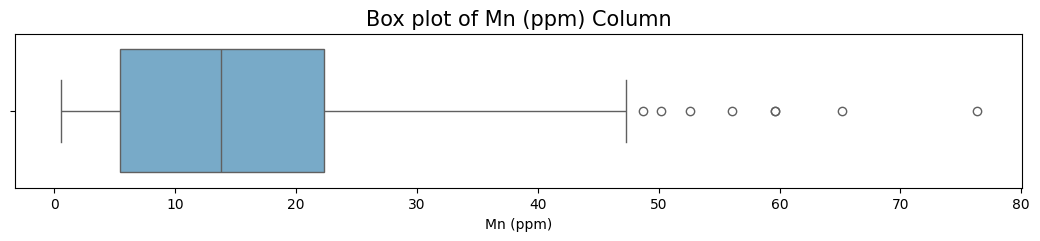

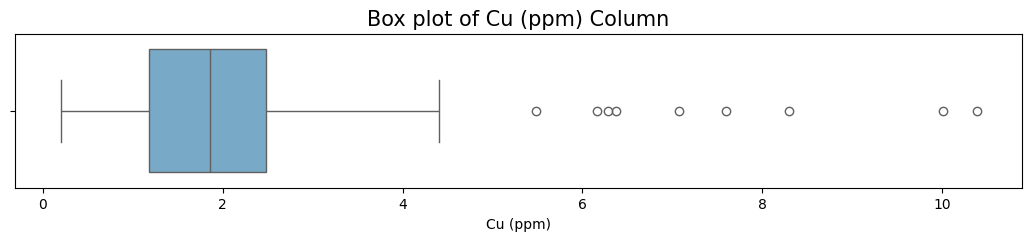

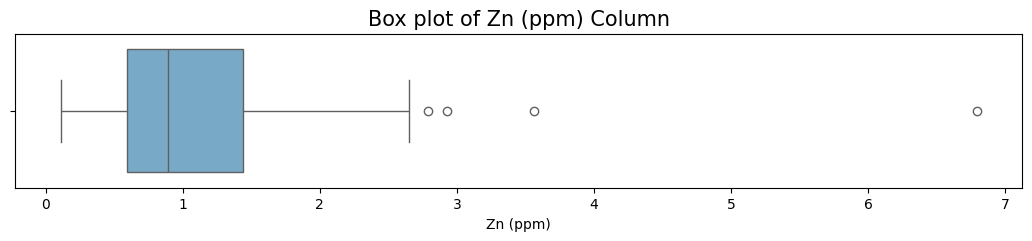

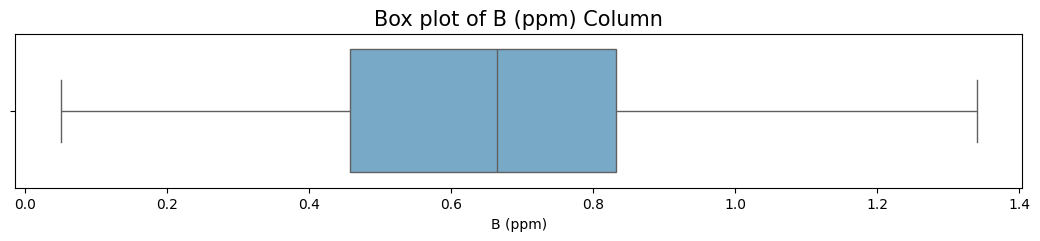

In [11]:
for col in c:

    plt.figure(figsize=(13, 2))
    sns.boxplot(x=df[col],palette='Blues')
    plt.title(f'Box plot of {col} Column', fontsize=15 )

In [12]:
for col in c:
    # Access the column data
    column = df[col]
    
    # Calculate the quartiles
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers in the column
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Calculate the number of outliers
    num_outliers = len(outliers)
    
    # Print the number of outliers in the current column
    print(f"Column '{col}' has {num_outliers} outliers.")


Column 'A(410)' has 8 outliers.
Column 'B(435)' has 5 outliers.
Column 'C(460)' has 2 outliers.
Column 'D(485)' has 3 outliers.
Column 'E(510)' has 3 outliers.
Column 'F(535)' has 0 outliers.
Column 'G(560)' has 2 outliers.
Column 'H(585)' has 4 outliers.
Column 'R(610)' has 2 outliers.
Column 'I(645)' has 6 outliers.
Column 'S(680)' has 3 outliers.
Column 'J(705)' has 2 outliers.
Column 'U(760)' has 4 outliers.
Column 'V(810)' has 0 outliers.
Column 'W(860)' has 2 outliers.
Column 'K(900)' has 2 outliers.
Column 'L(940)' has 1 outliers.
Column 'T(730)' has 4 outliers.
Column 'pH' has 0 outliers.
Column 'EC  (dS/m)' has 7 outliers.
Column 'OC (%)' has 1 outliers.
Column 'P   (kg/ha)' has 4 outliers.
Column 'K (kg/ha)' has 6 outliers.
Column 'Ca (meq/100g)' has 12 outliers.
Column 'Mg (meq/100g)' has 10 outliers.
Column 'S (ppm)' has 6 outliers.
Column 'Fe (ppm)' has 6 outliers.
Column 'Mn (ppm)' has 8 outliers.
Column 'Cu (ppm)' has 9 outliers.
Column 'Zn (ppm)' has 4 outliers.
Column 

In [13]:
#Since there are very few outliers we are not removing any of it

<Axes: >

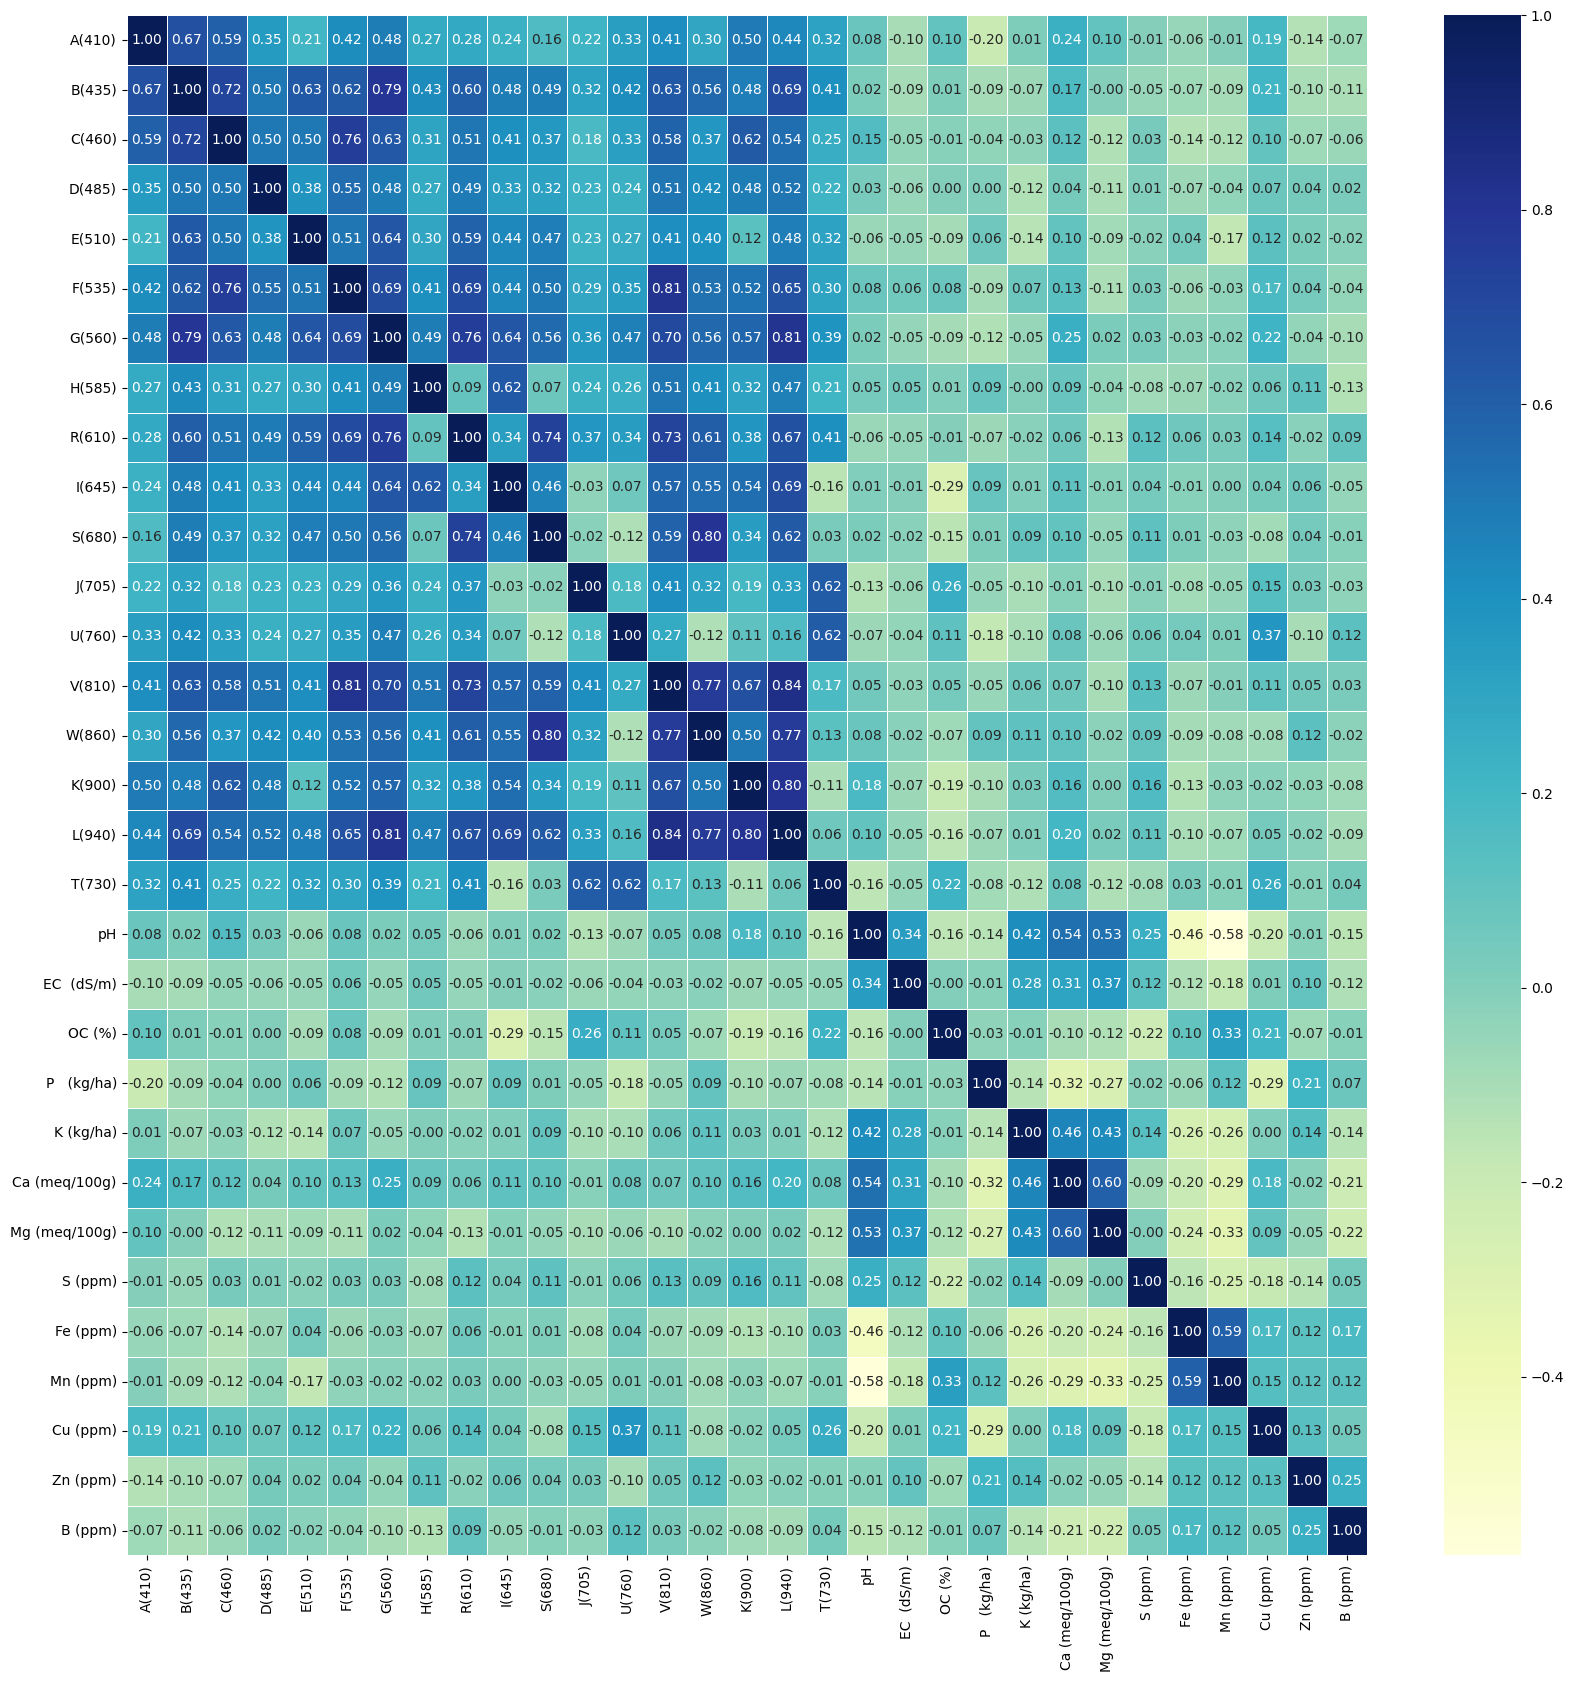

In [14]:
cm = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)


In [10]:
feature_columns = ['A(410)', 'B(435)', 'C(460)', 'D(485)', 'E(510)', 'F(535)', 'G(560)',
                   'H(585)', 'R(610)', 'I(645)', 'S(680)', 'J(705)', 'U(760)',
                   'V(810)', 'W(860)', 'K(900)', 'L(940)', 'T(730)']
target_columns = ['pH', 'EC  (dS/m)','OC (%)','P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 'Mg (meq/100g)',
             'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

In [11]:
# Separate features (X) and target variables (y)
X = df[feature_columns]
y = df[target_columns]

Adding Noise to the data in order to increase the size of the dataset

In [12]:
import numpy as np
import pandas as pd


# Function to add noise
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Apply noise to feature columns
df_augmented = df.copy()
df_augmented[feature_columns] = add_noise(df[feature_columns])

# Combine original and augmented data
df_combined = pd.concat([df, df_augmented], ignore_index=True)


In [13]:
df_combined

A(410)       B(435)       C(460)       D(485)       E(510)  \
0    2429.580000  1108.990000  2091.930000   737.330000   835.140000   
1    1707.900000   725.380000  1974.490000   670.810000   835.930000   
2    1750.410000  1102.020000  2481.050000   816.800000   960.650000   
3    2546.680000  1548.400000  2791.560000  1007.160000  1128.000000   
4    3090.540000  1266.420000  2933.880000   940.610000  1109.840000   
..           ...          ...          ...          ...          ...   
195  2247.435967   833.987057  2195.427142   523.884077   787.001737   
196  2374.082654   989.407281  2382.512685   567.007147   918.018040   
197  2318.546842   821.040709  2096.908853   507.282958   781.451533   
198  3289.155581  1234.544959  3234.427825   873.163608  1112.196638   
199  2163.049786  1015.785233  2471.660465   744.825757   963.049143   

          F(535)      G(560)      H(585)       R(610)      I(645)  ...  \
0    1376.820000  322.870000  318.870000  1305.330000  163.260000  ...   
1    1685.280000  370.310000  373.600000  1335.770000  185.560000  ...   
2    1741.430000  430.510000  437.880000  1206.990000  227.040000  ...   
3    1573.730000  488.660000  499.630000  1338.110000  261.840000  ...   
4    2047.640000  500.910000  512.700000  1482.110000  267.190000  ...   
..           ...         ...         ...          ...         ...  ...   
195  1074.348251  324.626378  324.888120   855.770188  161.454795  ...   
196  1189.649291  320.853461  317.358945   820.680290  159.684710  ...   
197  1070.600508  306.361323  298.272190   742.233049  150.764424  ...   
198  1742.179355  486.386561  491.593035  1450.506075  254.693670  ...   
199  1475.601523  398.507787  415.782404  1132.646303  205.906322  ...   

     P   (kg/ha)  K (kg/ha)  Ca (meq/100g)  Mg (meq/100g)  S (ppm)  Fe (ppm)  \
0          26.10     444.00       6.140000           2.32    11.21      3.08   
1          81.99     372.00       5.980000           0.50    12.93     47.74   
2          80.59     132.00       3.150000           2.49     5.17     14.96   
3          33.81     221.76       3.400000           1.90    11.59      6.38   
4          38.19     234.08       6.600000           5.20    34.10     14.08   
..           ...        ...            ...            ...      ...       ...   
195        31.71     582.00      13.420652          15.00     8.60      6.27   
196         8.58     396.00      13.420652           4.00     1.90      1.18   
197         8.75     718.20      33.500000          14.30    11.04      3.70   
198        19.38     217.80       6.800000           5.80    48.11      1.84   
199        22.42     197.12       5.810000           1.63     7.45     41.17   

     Mn (ppm)  Cu (ppm)  Zn (ppm)  B (ppm)  
0       14.10      2.23      0.84     1.22  
1       37.63      3.28      6.79     1.13  
2       44.53      1.22      1.21     0.98  
3       10.62      1.77      0.99     0.27  
4        3.56      1.56      0.40     0.77  
..        ...       ...       ...      ...  
195      5.39      1.27      0.73     0.26  
196      1.40      1.00      0.75     0.37  
197     16.56      2.09      1.48     0.63  
198      7.29      1.82      1.31     0.15  
199     48.71      2.47      2.65     0.97  

[200 rows x 31 columns]

In [14]:
# Separate features (X) and target variables (y)
X = df_combined[feature_columns]
y = df_combined[target_columns]

# Transforming the data- Feature Engineering

In [15]:
# Standardisation
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xts = scaler.fit_transform(X) #X train and test scaled

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xts, y, test_size=0.2, random_state=42)

In [17]:
print("Samples in Training data ", len(X_train))
print("Samples in Testing data ", len(X_test))

Samples in Training data  160
Samples in Testing data  40


# Model Training 

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train Random Forest Regressor model for multiple target variables
rfr = RandomForestRegressor(random_state=42)

# Wrap Random Forest Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_rfr = MultiOutputRegressor(rfr)

# Fit the Random Forest Regressor model
multioutput_rfr.fit(X_train, y_train)

# Predict for the test set
y_pred_rfr = multioutput_rfr.predict(X_test)
y_pred_train_rfr=multioutput_rfr.predict(X_train)
# Calculate performance metrics
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

print("Random Forest Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rfr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rfr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.4f}")
print(f"R² Score: {r2_rfr:.4f}")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")

Random Forest Regressor Performance Metrics:
Mean Squared Error (MSE): 901.2640
Mean Absolute Error (MAE): 8.7504
Root Mean Squared Error (RMSE): 30.0211
R² Score: 0.6761
R² Score on Training Data: 0.9281


In [19]:
#It indicates the model is overfitted

# Grid Search CV - Hyperparameter tuning 

In [20]:

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your predictors and target variables
# X = ... (shape: [100, 18])
# y = ... (shape: [100, 13])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Wrap RandomForestRegressor in MultiOutputRegressor
multioutput_rfr = MultiOutputRegressor(rfr)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(multioutput_rfr, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_rfr = best_model.predict(X_test)
y_pred_train_rfr = best_model.predict(X_train)

# Calculate R² score for the training set
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

# Calculate R² score for the test set
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print performance metrics
print("Random Forest Regressor Performance Metrics with Tuned Hyperparameters:")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")
print(f"R² Score on Test Data: {r2_rfr:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {mean_squared_error(y_test, y_pred_rfr):.4f}")
print(f"Mean Absolute Error (MAE) on Test Data: {mean_absolute_error(y_test, y_pred_rfr):.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Random Forest Regressor Performance Metrics with Tuned Hyperparameters:
R² Score on Training Data: 0.9302
R² Score on Test Data: 0.6794
Mean Squared Error (MSE) on Test Data: 908.5827
Mean Absolute Error (MAE) on Test Data: 8.7493
Root Mean Squared Error (RMSE) on Test Data: 30.1427


# Choosing the important features

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X and y are your predictors and target variables
# X = ... (shape: [100, 18])
# y = ... (shape: [100, 13])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest to get feature importances
rfr = RandomForestRegressor(random_state=42)
multioutput_rfr = MultiOutputRegressor(rfr)
multioutput_rfr.fit(X_train, y_train)

# Get feature importances (average across all outputs)
feature_importances = np.mean([tree.feature_importances_ for tree in multioutput_rfr.estimators_], axis=0)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(feature_importance_df)

# Select top N features (e.g., top 10 features)
top_n_features = feature_importance_df['Feature'].values[:10]

# Create a new dataset with only the top N features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(MultiOutputRegressor(RandomForestRegressor(random_state=42)), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict
best_model = grid_search.best_estimator_
y_pred_rfr = best_model.predict(X_test_selected)
y_pred_train_rfr = best_model.predict(X_train_selected)

# Calculate R² score for the training set with selected features
r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

# Calculate R² score for the test set with selected features
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print performance metrics
print("Random Forest Regressor Performance Metrics with Selected Features:")
print(f"R² Score on Training Data: {r2_train_rfr:.4f}")
print(f"R² Score on Test Data: {r2_rfr:.4f}")
print(f"Mean Squared Error (MSE) on Test Data: {mean_squared_error(y_test, y_pred_rfr):.4f}")
print(f"Mean Absolute Error (MAE) on Test Data: {mean_absolute_error(y_test, y_pred_rfr):.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {np.sqrt(mean_squared_error(y_test, y_pred_rfr)):.4f}")

Feature importances:
   Feature  Importance
5   F(535)    0.104879
0   A(410)    0.073066
1   B(435)    0.070810
2   C(460)    0.066538
15  K(900)    0.065649
4   E(510)    0.060306
8   R(610)    0.059118
9   I(645)    0.055514
14  W(860)    0.055179
10  S(680)    0.054850
17  T(730)    0.051926
16  L(940)    0.045861
12  U(760)    0.043875
7   H(585)    0.042052
3   D(485)    0.042016
6   G(560)    0.040720
11  J(705)    0.034026
13  V(810)    0.033615
Best parameters found:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Random Forest Regressor Performance Metrics with Selected Features:
R² Score on Training Data: 0.9326
R² Score on Test Data: 0.7032
Mean Squared Error (MSE) on Test Data: 843.2103
Mean Absolute Error (MAE) on Test Data: 8.3438
Root Mean Squared Error (RMSE) on Test Data: 29.0381


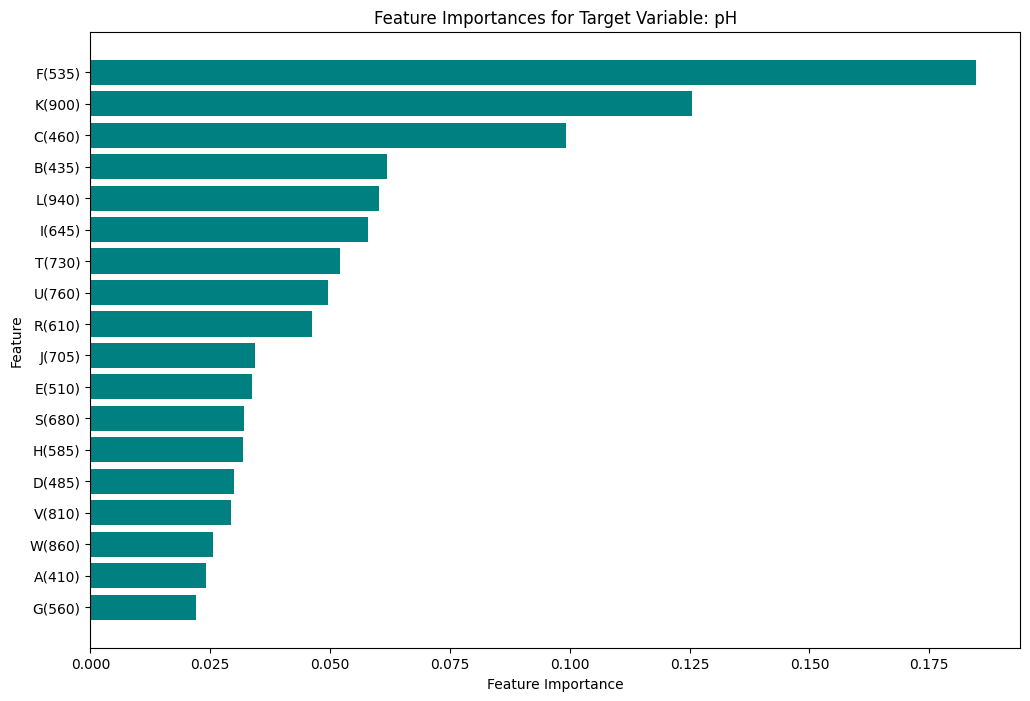

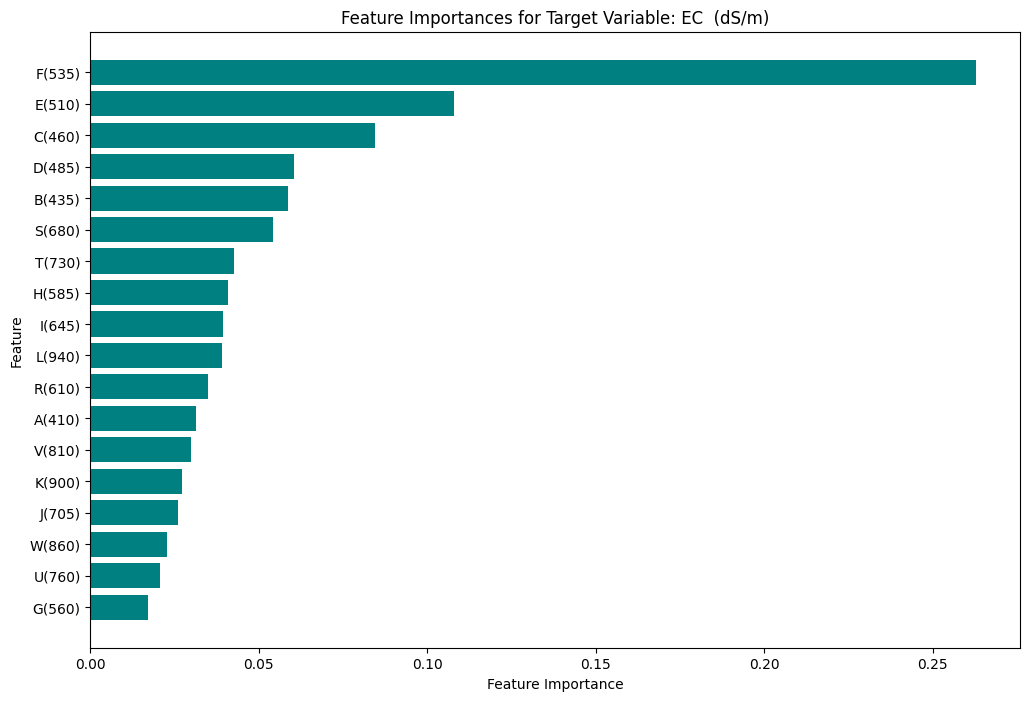

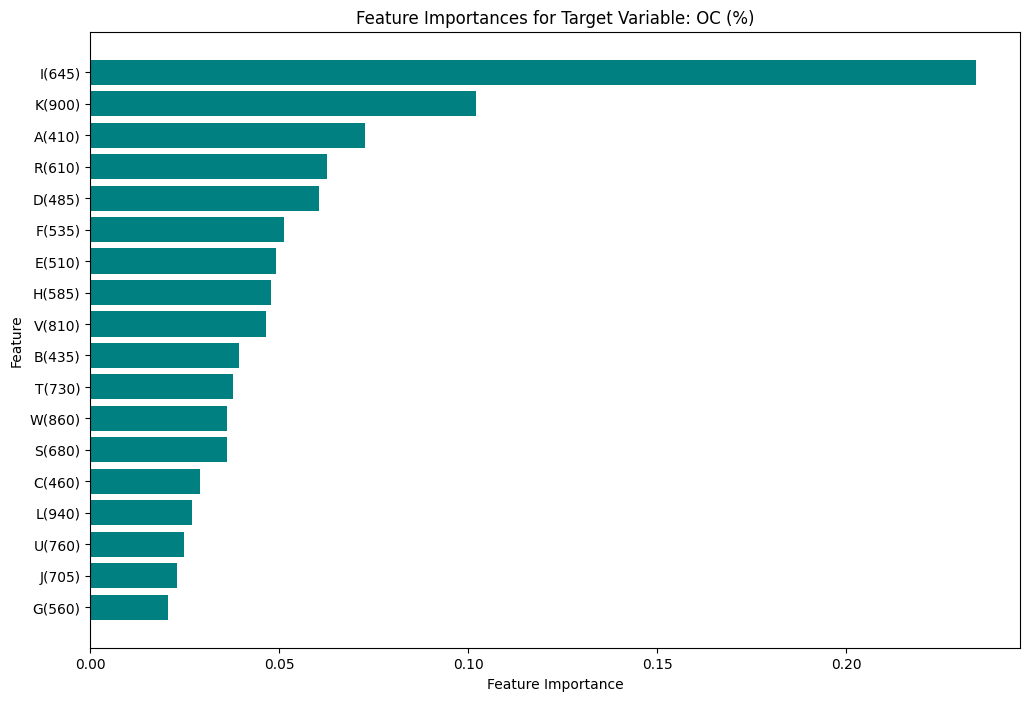

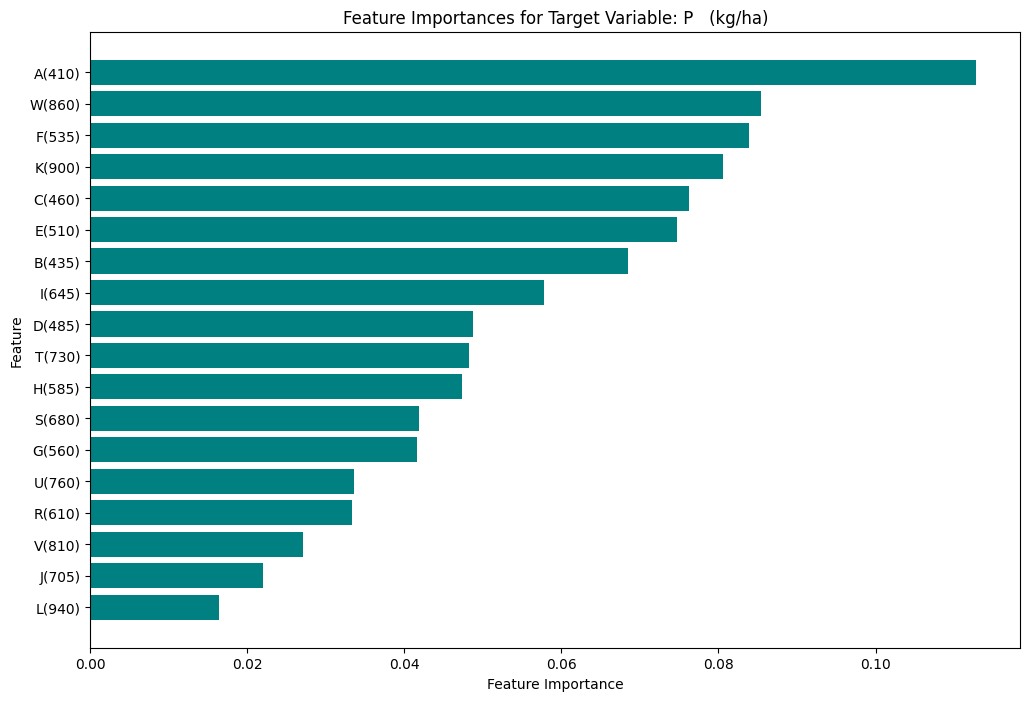

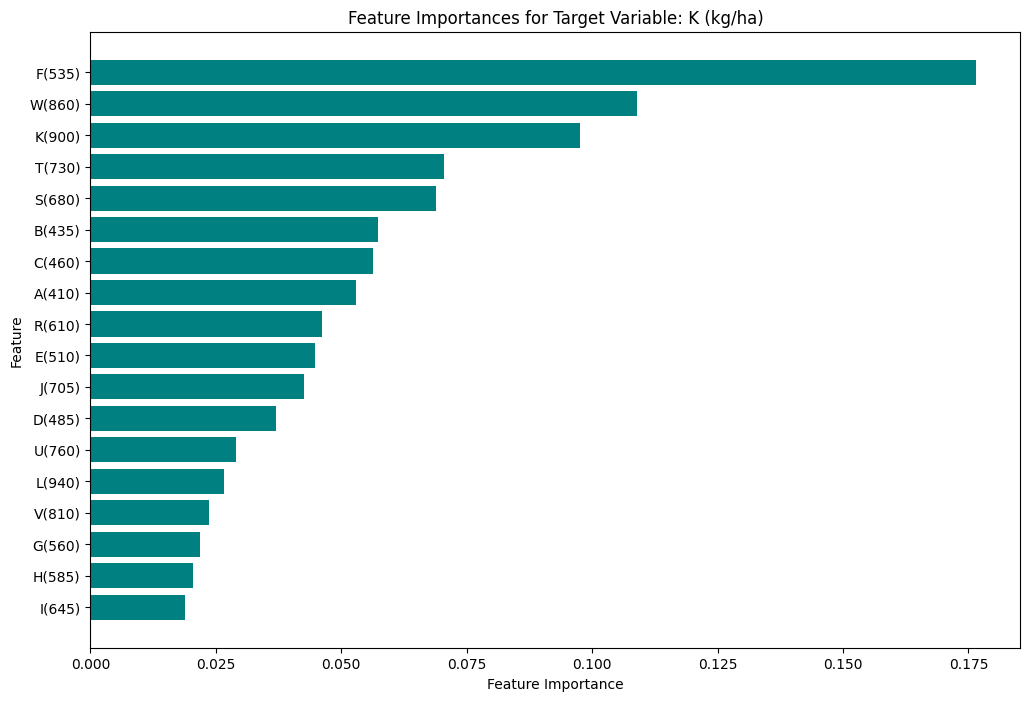

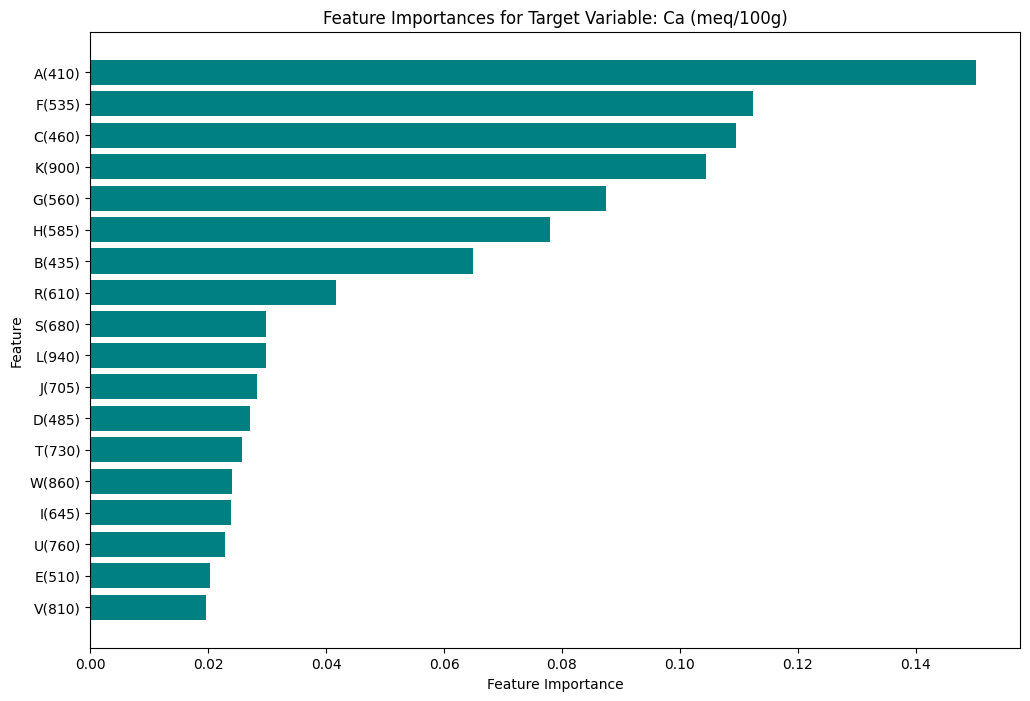

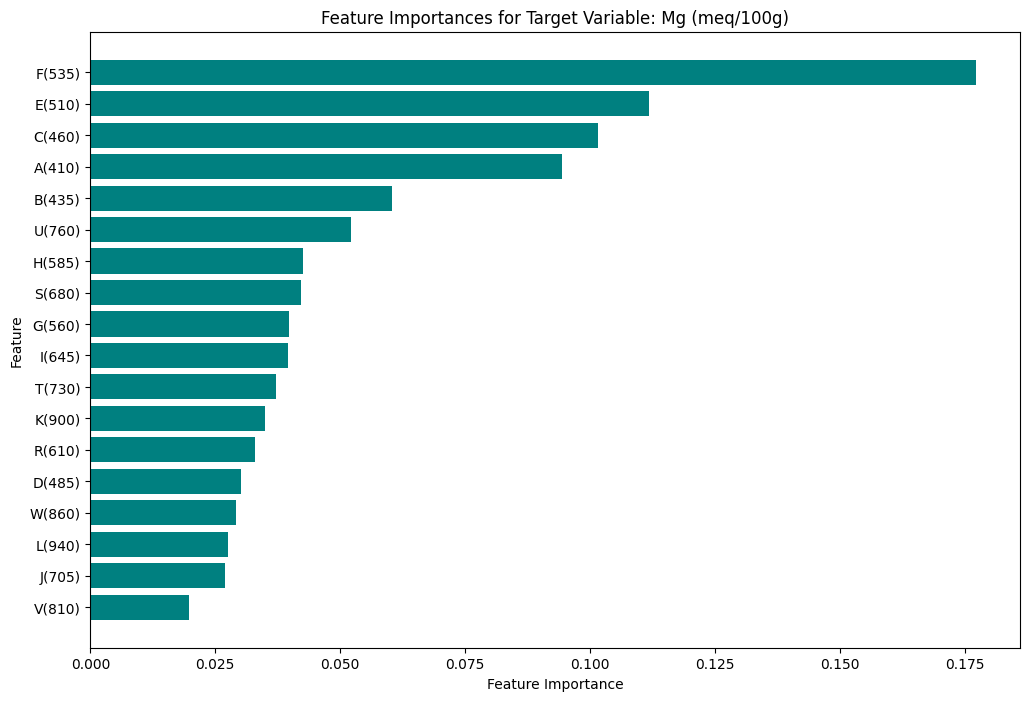

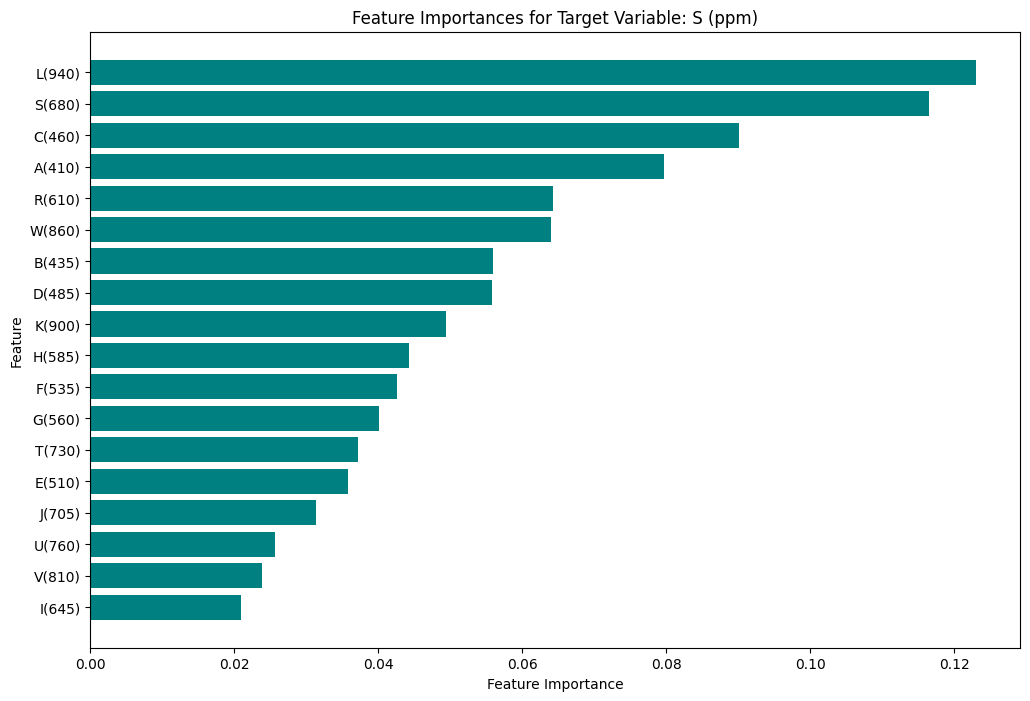

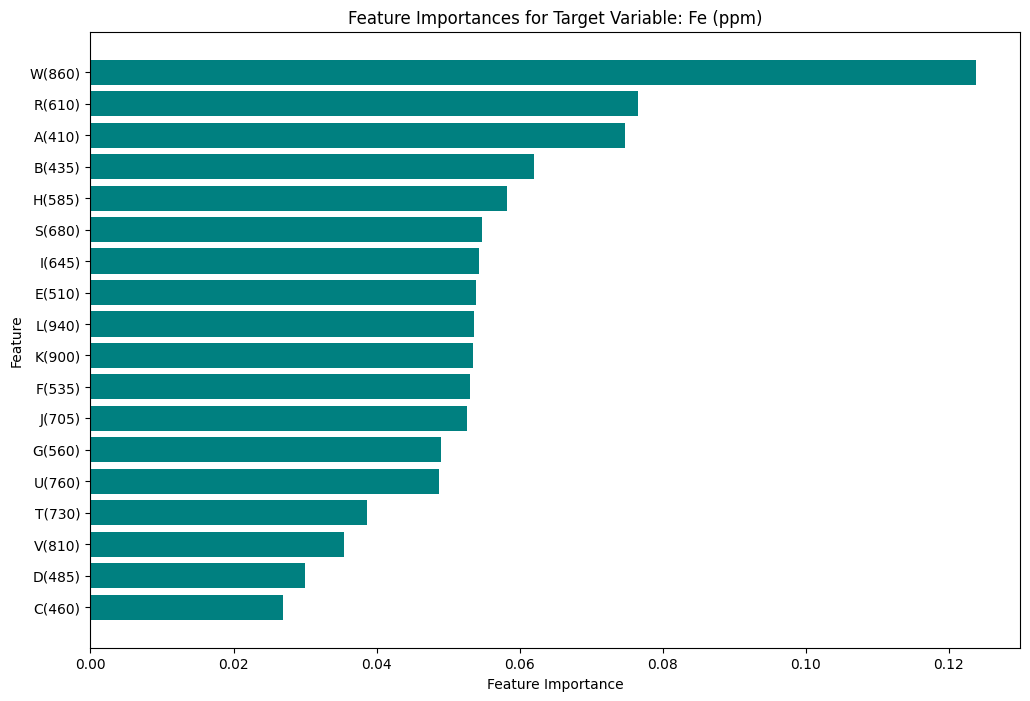

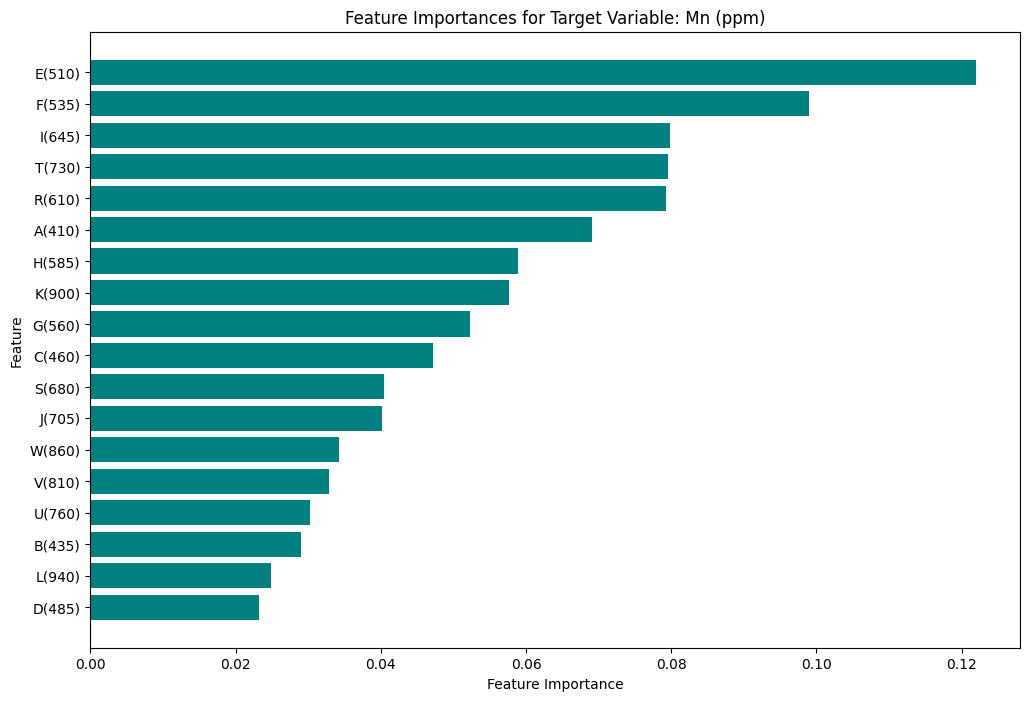

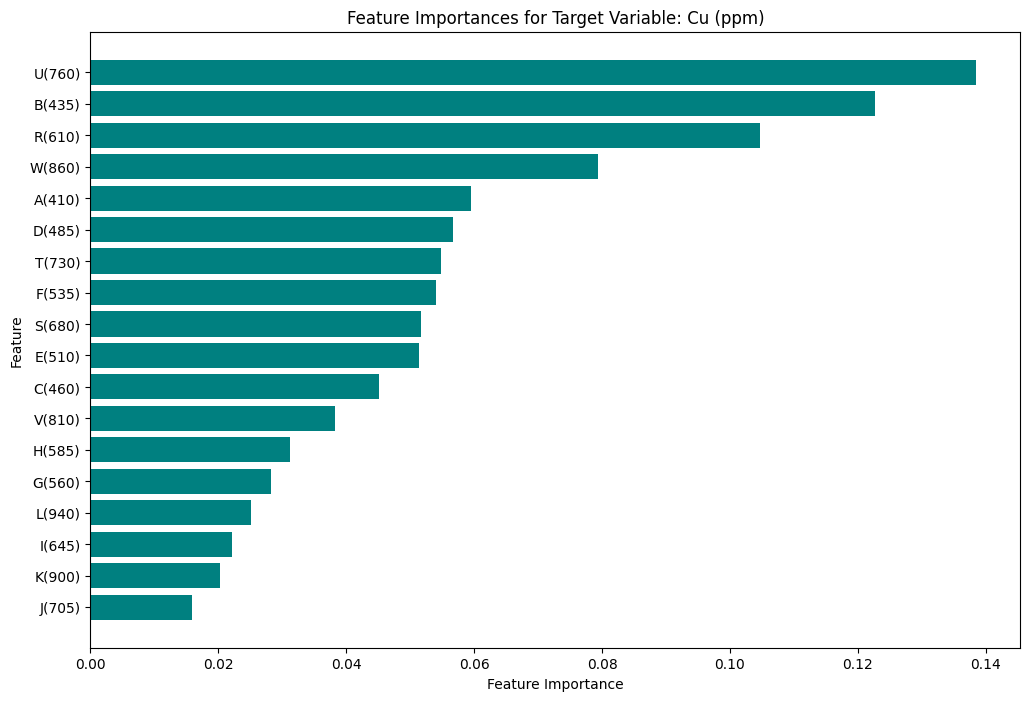

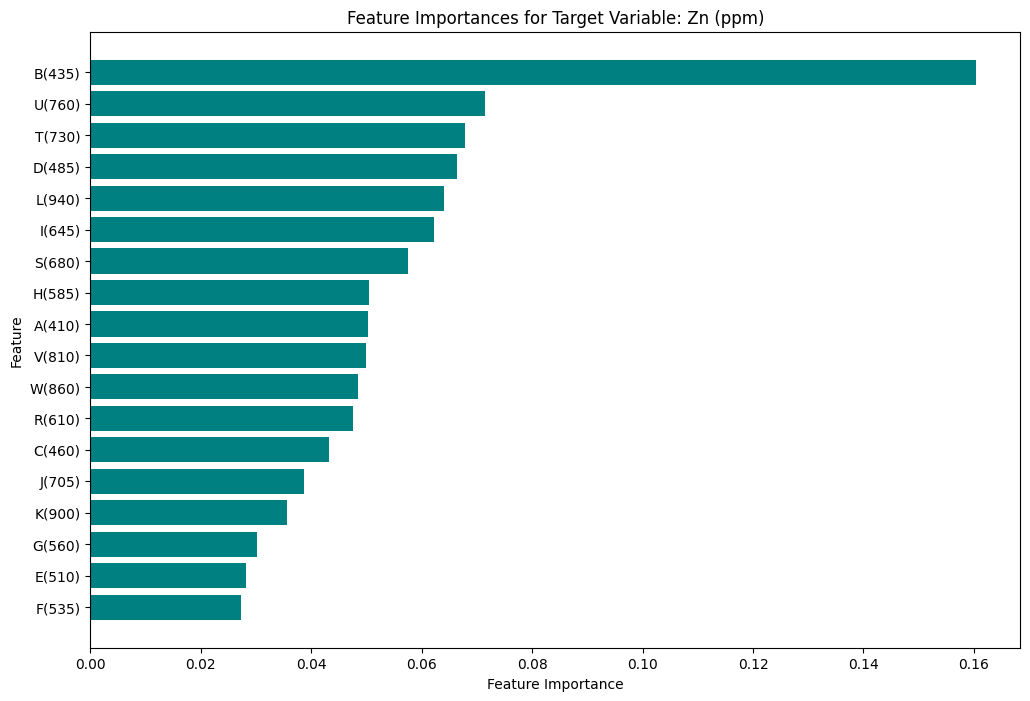

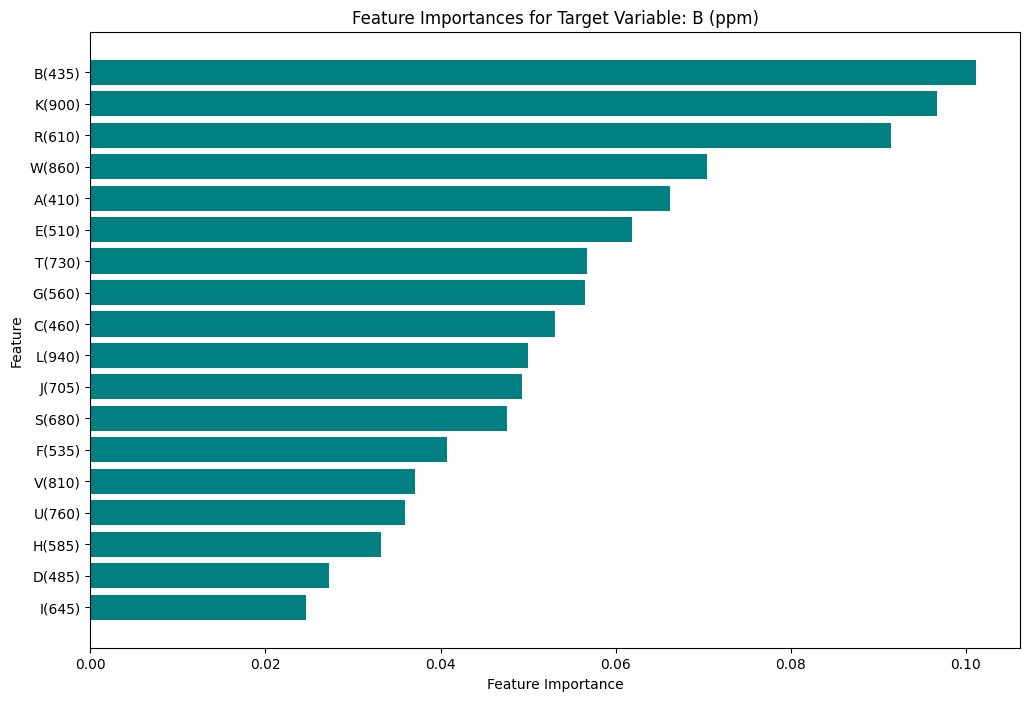

In [23]:
# Get feature importances for each target variable
feature_importances_per_target = [est.feature_importances_ for est in multioutput_rfr.estimators_]

# Convert the results into a DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importances_per_target, columns=X.columns, index=y.columns)

# Plot feature importances for each target variable
for target in y.columns:
    plt.figure(figsize=(12, 8))
    sorted_idx = feature_importance_df.loc[target].sort_values(ascending=False).index
    sorted_importances = feature_importance_df.loc[target].sort_values(ascending=False)
    
    plt.barh(sorted_idx, sorted_importances, color='teal')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for Target Variable: {target}')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

Feature importances:
   Feature  Importance
0   A(410)    0.096183
5   F(535)    0.091512
1   B(435)    0.079265
2   C(460)    0.074788
4   E(510)    0.069416
14  W(860)    0.064798
8   R(610)    0.063210
15  K(900)    0.059099
10  S(680)    0.058746
17  T(730)    0.047549
12  U(760)    0.044891
9   I(645)    0.040281
6   G(560)    0.037835
3   D(485)    0.035587
7   H(585)    0.035512
16  L(940)    0.035158
13  V(810)    0.034319
11  J(705)    0.031854


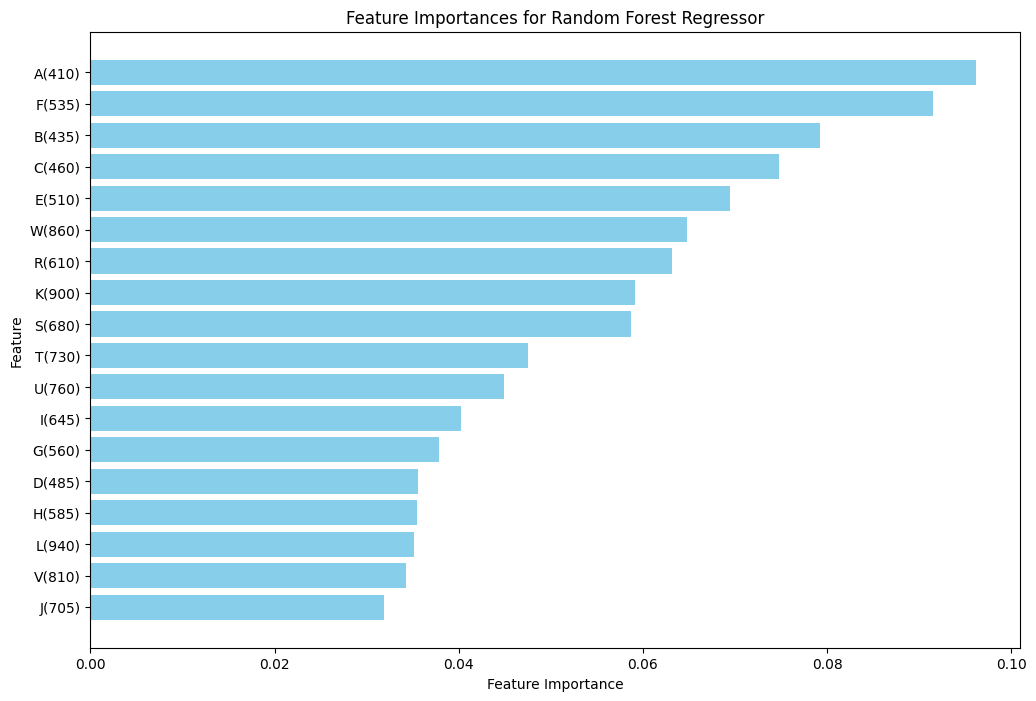

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

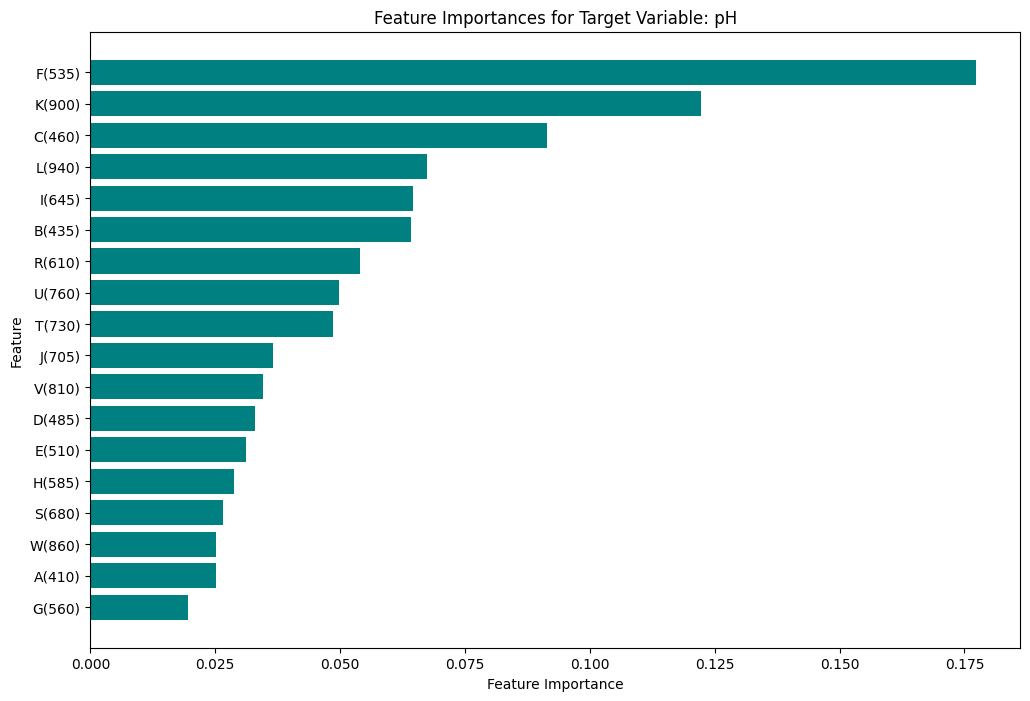

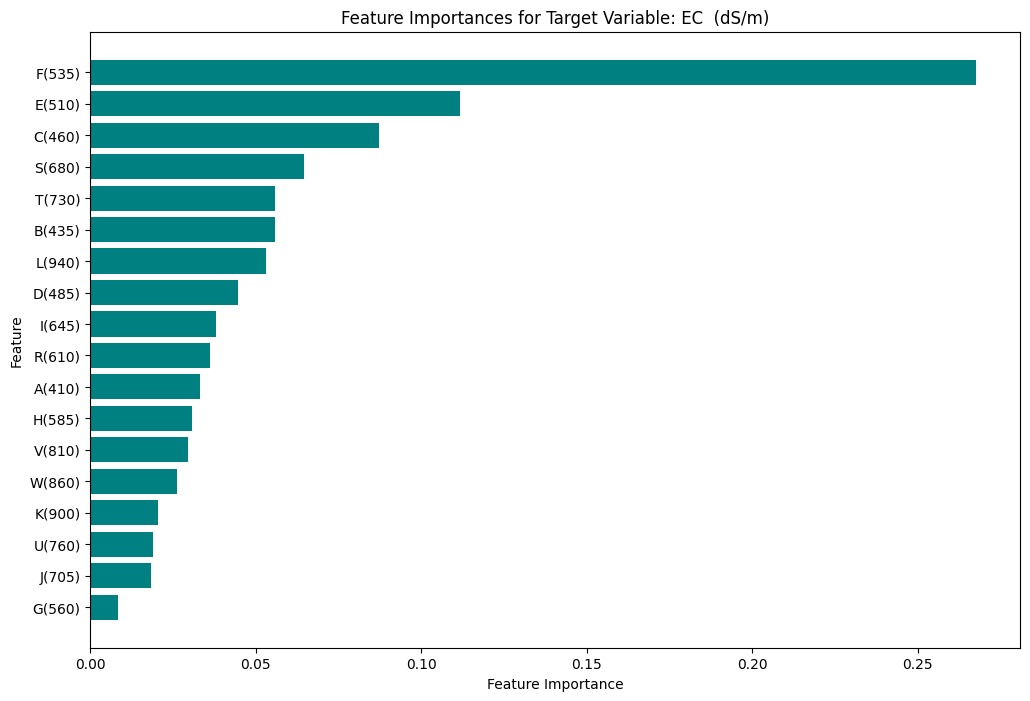

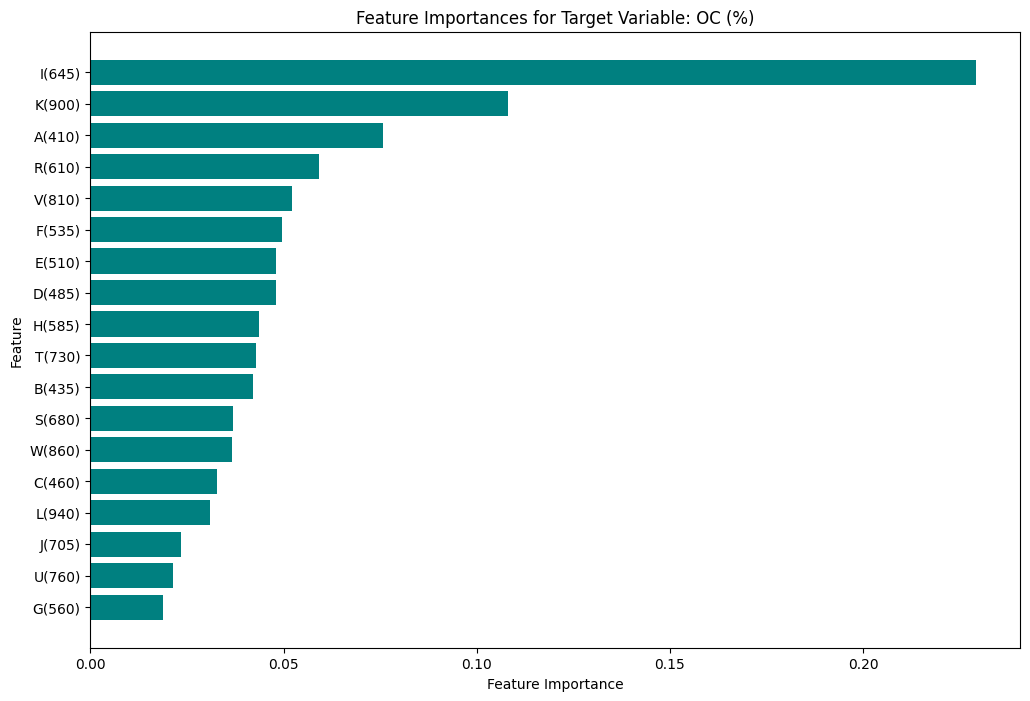

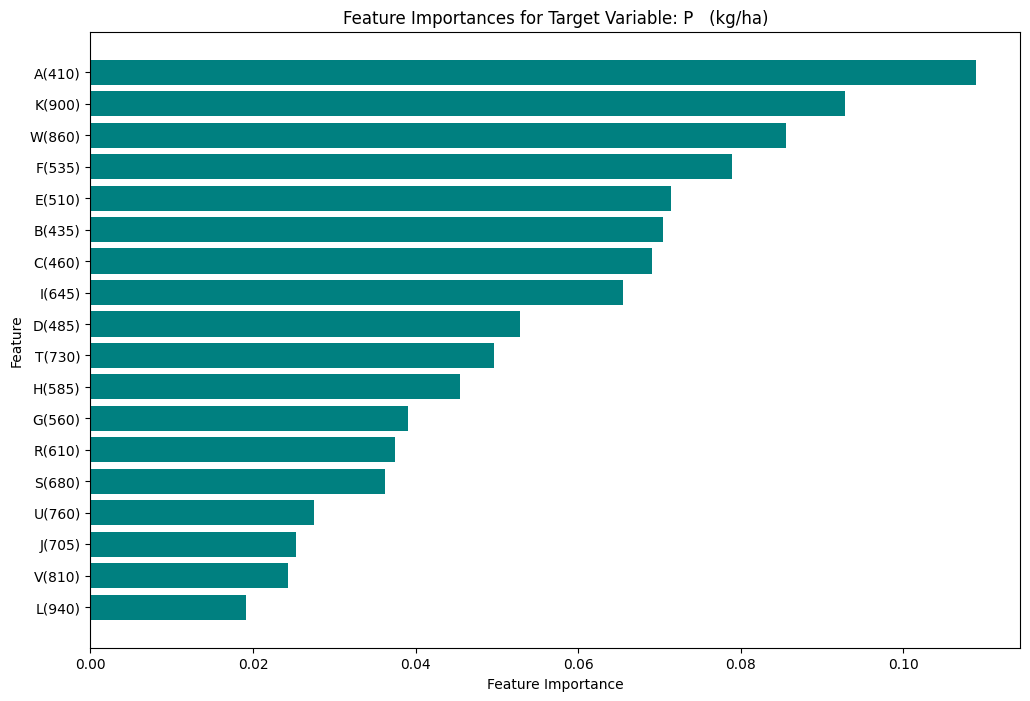

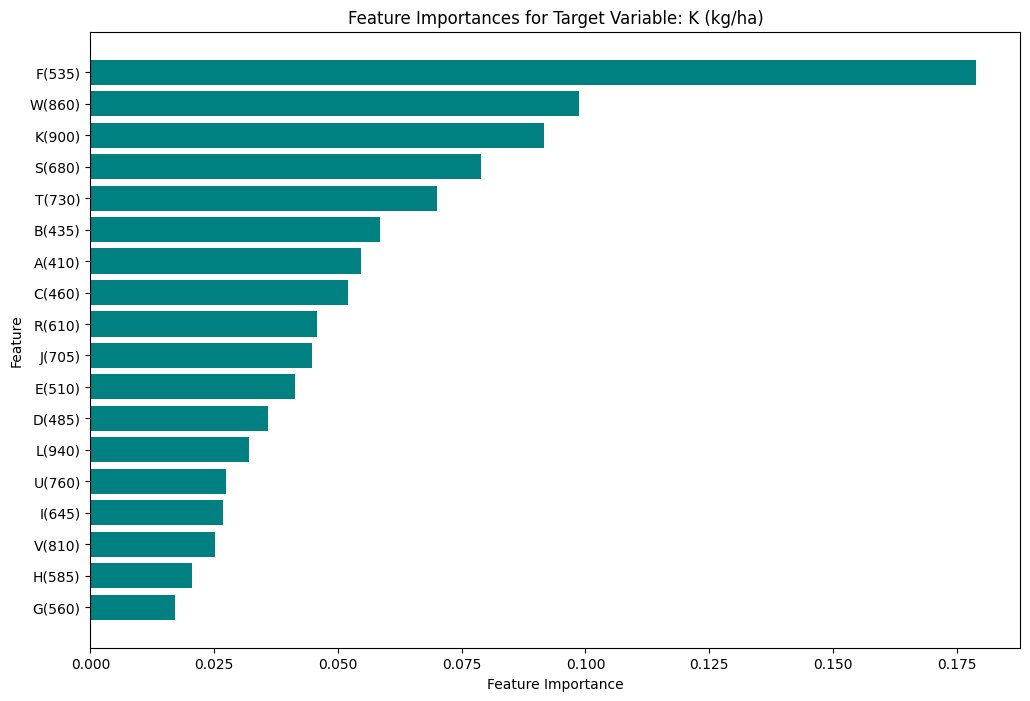

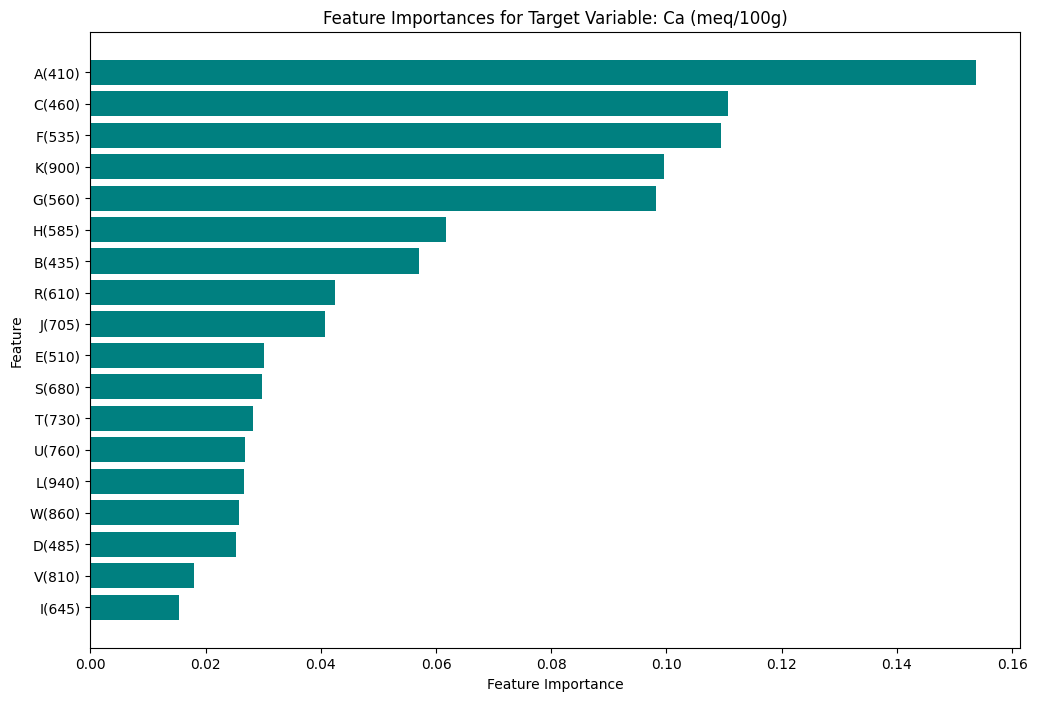

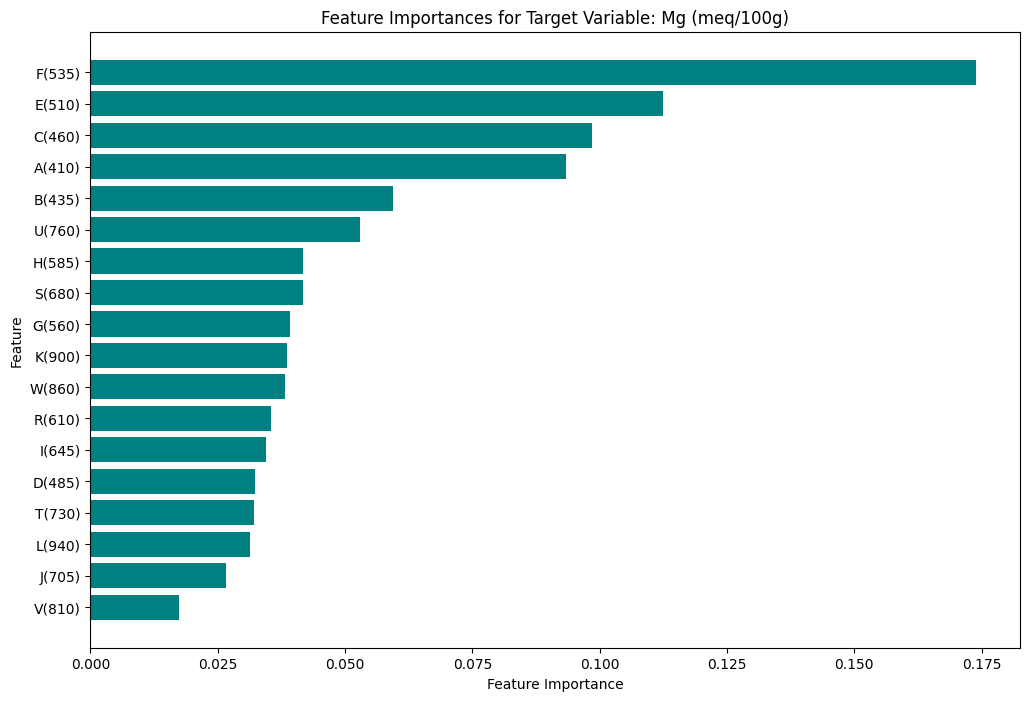

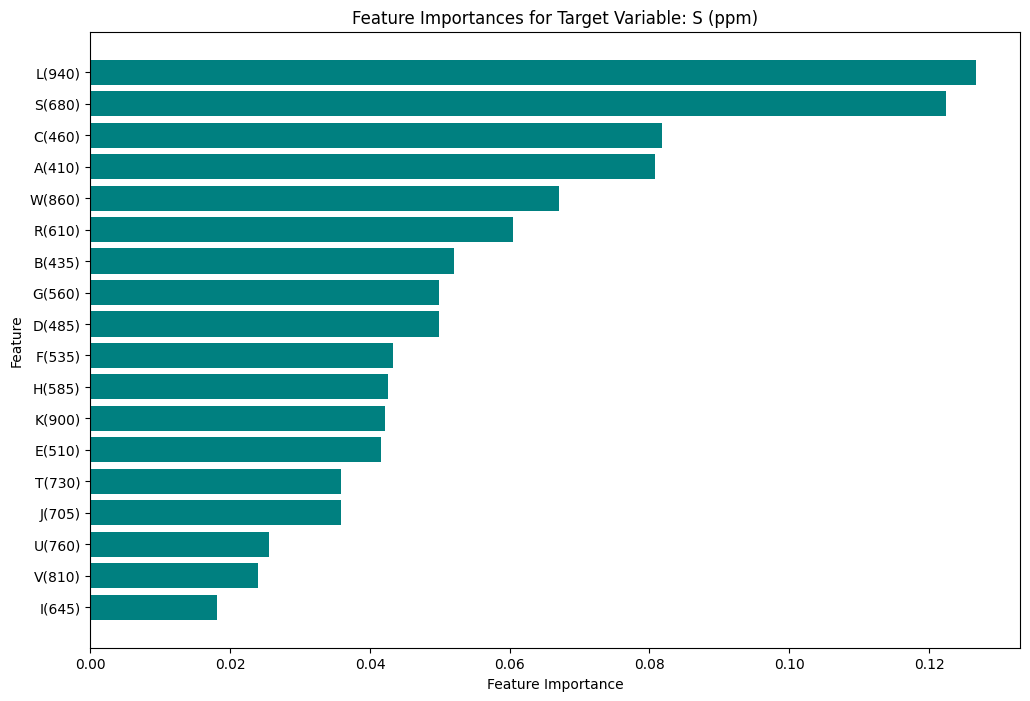

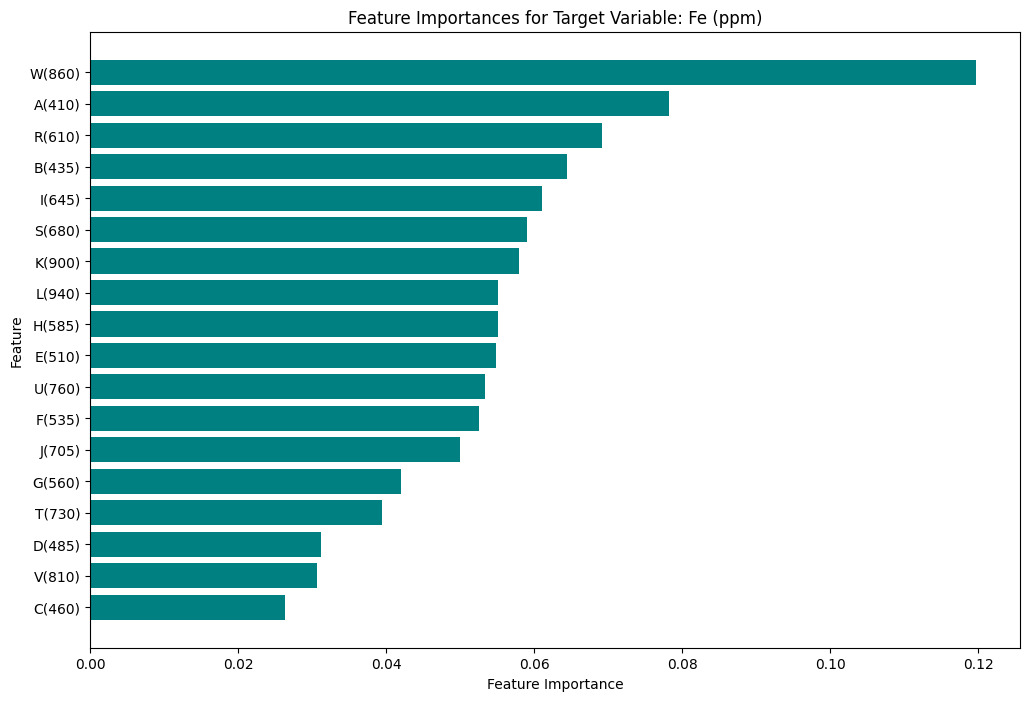

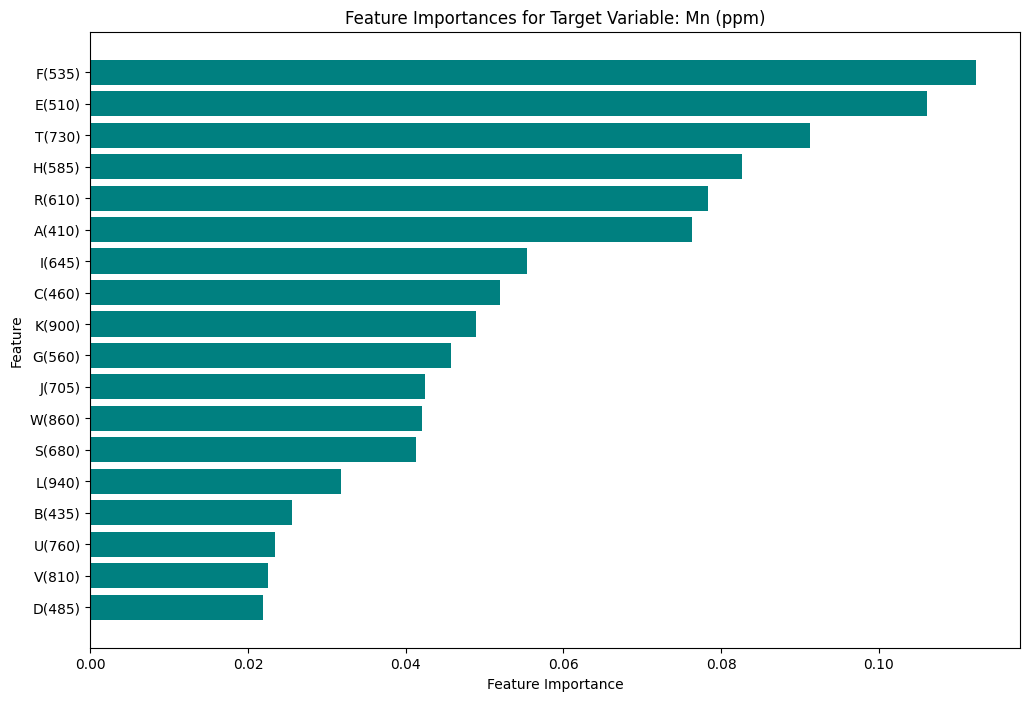

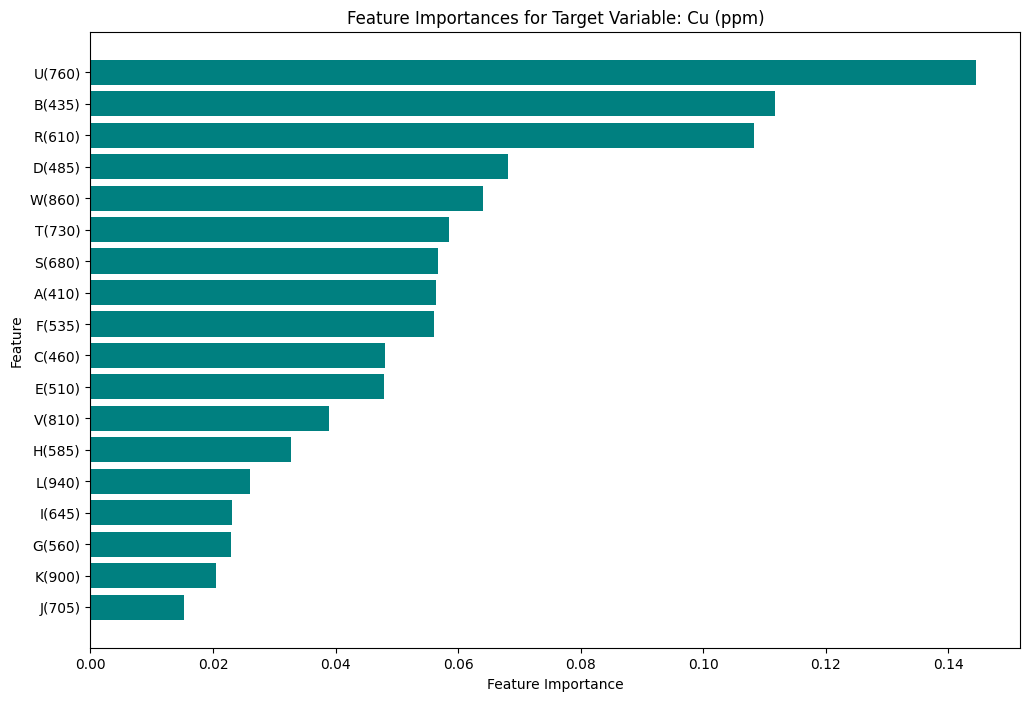

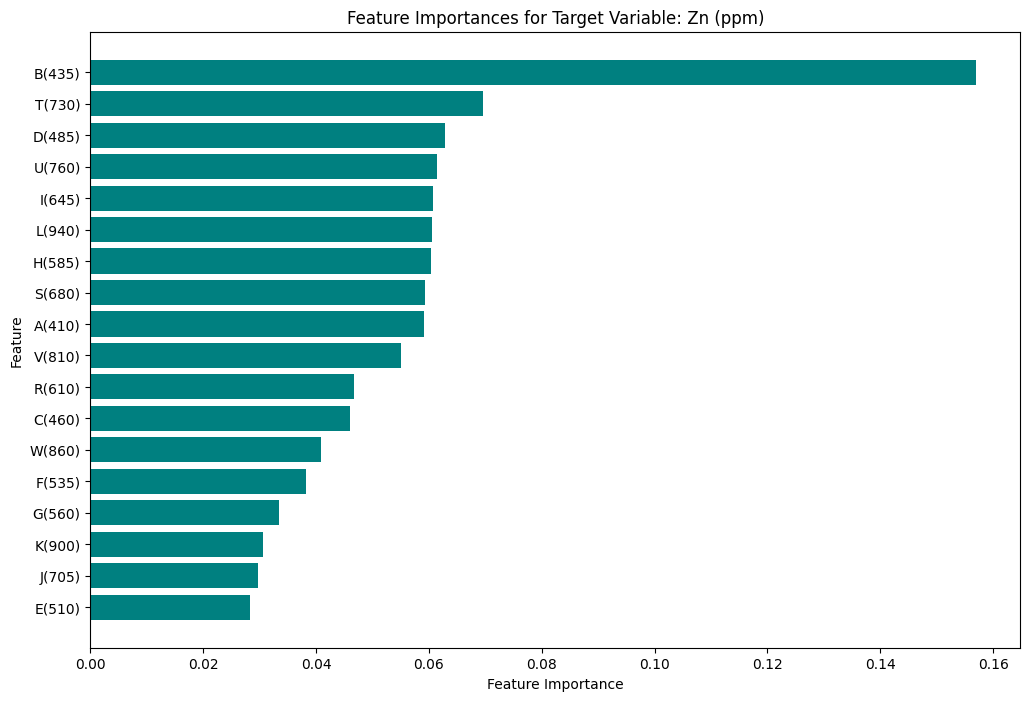

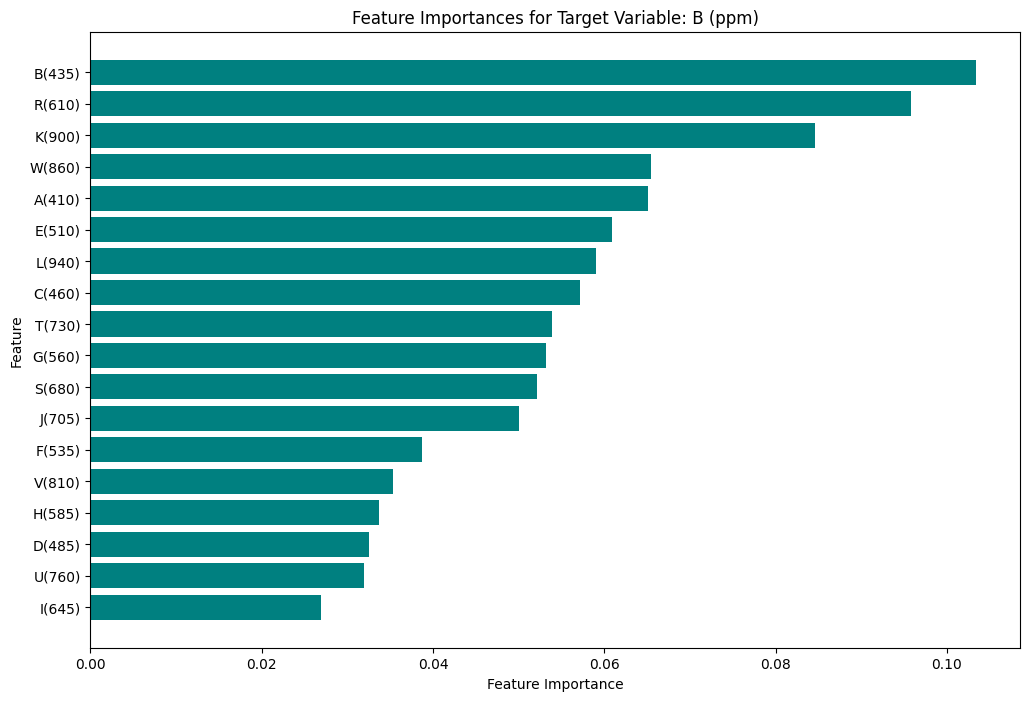

In [ ]:
# Get feature importances for each target variable
feature_importances_per_target = [est.feature_importances_ for est in multioutput_rfr.estimators_]

# Convert the results into a DataFrame for better visualization
feature_importance_df = pd.DataFrame(feature_importances_per_target, columns=X.columns, index=y.columns)

# Plot feature importances for each target variable
for target in y.columns:
    plt.figure(figsize=(12, 8))
    sorted_idx = feature_importance_df.loc[target].sort_values(ascending=False).index
    sorted_importances = feature_importance_df.loc[target].sort_values(ascending=False)
    
    plt.barh(sorted_idx, sorted_importances, color='teal')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances for Target Variable: {target}')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

# Grid Search CV using diffreent parameters (underfitting)

In [ ]:
'''rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_'''

"rf_param_grid = {\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\nrf = RandomForestRegressor(random_state=42)\nrf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')\nrf_grid_search.fit(X_train, y_train)\n\nbest_rf_model = rf_grid_search.best_estimator_"

In [ ]:
'''from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"R-squared on test data(R2) Score: {test_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")

# Apply the function for each model
print("Random Forest Model Evaluation:")
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)'''

'from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error\n\ndef evaluate_model(model, X_train, X_test, y_train, y_test):\n    # Training predictions\n    y_train_pred = model.predict(X_train)\n    \n    # Testing predictions\n    y_test_pred = model.predict(X_test)\n    \n    # Calculate evaluation metrics\n    train_mse = mean_squared_error(y_train, y_train_pred)\n    test_mse = mean_squared_error(y_test, y_test_pred)\n    train_r2 = r2_score(y_train, y_train_pred)\n    test_r2 = r2_score(y_test, y_test_pred)\n    train_mae = mean_absolute_error(y_train, y_train_pred)\n    test_mae = mean_absolute_error(y_test, y_test_pred)\n    train_rmse=np.sqrt(train_mse)\n    \n    # Print the metrics\n    print(f"Mean Squared Error (MSE): {train_mse}")\n    print(f"R-squared (R2) Score: {train_r2}")\n    print(f"R-squared on test data(R2) Score: {test_r2}")\n    print(f"Mean Absolute Error (MAE): {train_mae}")\n    print(f"Root Mean Squared Error (RMSE): {train_rmse}")\n\n# 

In [25]:
import pickle

with open('rfc.pkl', 'wb') as file :
    pickle.dump(multioutput_rfr,file)

In [26]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

{'pH': 7.876500000000009, 'EC  (dS/m)': 0.3474536842105264, 'OC (%)': 1.3084000000000002, 'P   (kg/ha)': 39.139099999999964, 'K (kg/ha)': 302.668188421053, 'Ca (meq/100g)': 9.560019565217388, 'Mg (meq/100g)': 4.767381052631581, 'S (ppm)': 46.758005263157884, 'Fe (ppm)': 21.372865263157916, 'Mn (ppm)': 29.412799999999976, 'Cu (ppm)': 2.3233842105263154, 'Zn (ppm)': 0.9653442105263165, 'B (ppm)': 0.5613863157894741}


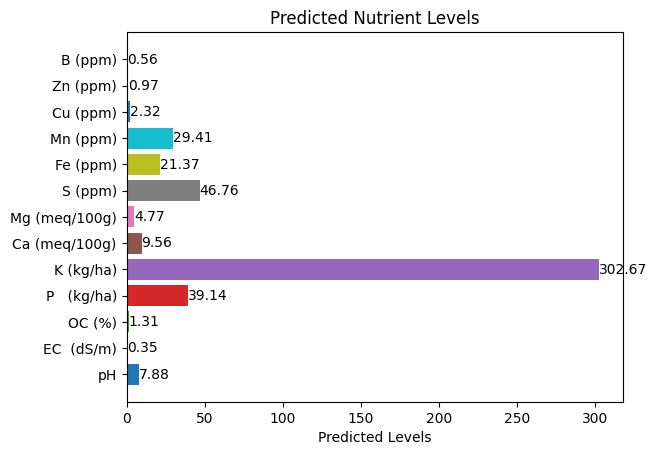

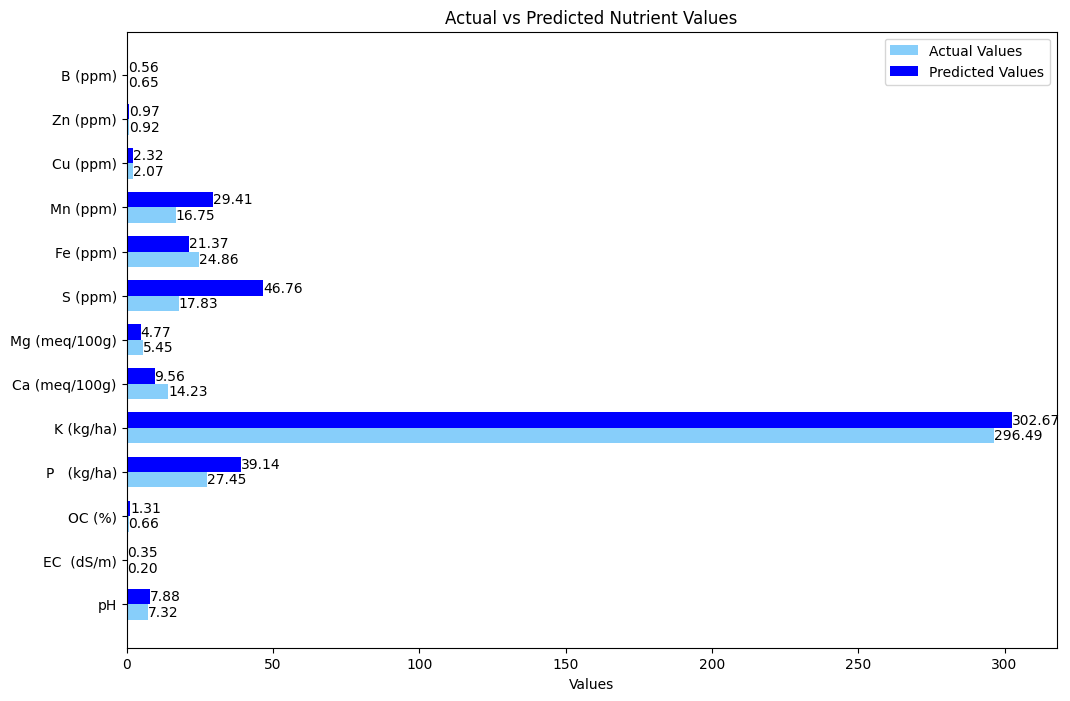

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [2429],
    'B(435)': [1108],
    'C(460)': [2091],
    'D(485)': [737],
    'E(510)': [835],
    'F(535)': [1376],
    'G(560)': [322],
    'H(585)': [318],
    'R(610)': [1305],
    'I(645)': [163],
    'S(680)': [332],
    'J(705)': [51],
    'U(760)': [76],
    'V(810)': [237],
    'W(860)': [305],
    'K(900)': [60],
    'L(940)': [38],
    'T(730)': [84]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler.transform(df2)
prediction = multioutput_rfr.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()


Elastic Net


In [21]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
# uses the penalties from both the lasso and ridge techniques to regularize regression models. 
# Create and train the multi-target regression model (ElasticNet)
multioutput_model = MultiOutputRegressor(
    ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=5)
multioutput_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=ElasticNet(alpha=0.5), n_jobs=5)

In [22]:
# Predict for the test set
y_pred_en = multioutput_model.predict(X_test)
y_pred_train_en =multioutput_model.predict(X_train)
# Calculate performance metrics
mse_en = mean_squared_error(y_test, y_pred_en)
mae_en = mean_absolute_error(y_test, y_pred_en)
rmse_en = np.sqrt(mse_en)
r2_en = r2_score(y_test, y_pred_en)
r2_train_en = r2_score(y_train, y_pred_train_en)

print("Elastic Net Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_en:.4f}")
print(f"Mean Absolute Error (MAE): {mae_en:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_en:.4f}")
print(f"R² Score: {r2_en:.4f}")
print(f"R² Score on Training Data: {r2_train_en:.4f}")

Elastic Net Regressor Performance Metrics:
Mean Squared Error (MSE): 2113.6088
Mean Absolute Error (MAE): 15.3510
Root Mean Squared Error (RMSE): 45.9740
R² Score: 0.0652
R² Score on Training Data: 0.1817


{'pH': 7.148533426271684, 'EC  (dS/m)': 0.3917059650698877, 'OC (%)': 1.031261284735013, 'P   (kg/ha)': 49.23147837290934, 'K (kg/ha)': 738.9434673351387, 'Ca (meq/100g)': -29.032336256462482, 'Mg (meq/100g)': 4.882017391278816, 'S (ppm)': 25.122296744047503, 'Fe (ppm)': 24.60374812108828, 'Mn (ppm)': 31.766368527339527, 'Cu (ppm)': 0.21764370835175786, 'Zn (ppm)': 0.8229617030483928, 'B (ppm)': 0.7915423209596362}


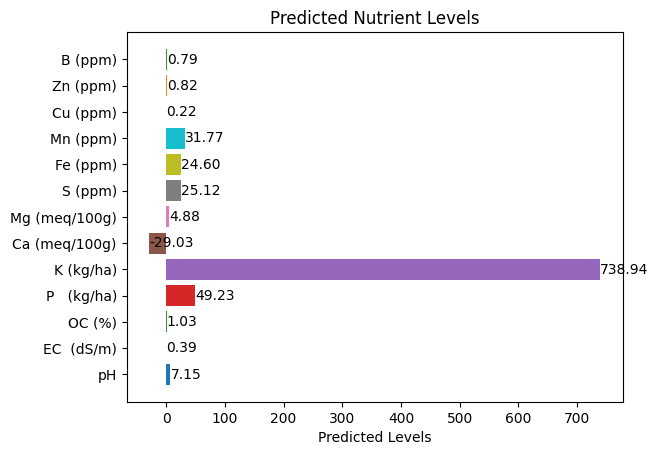

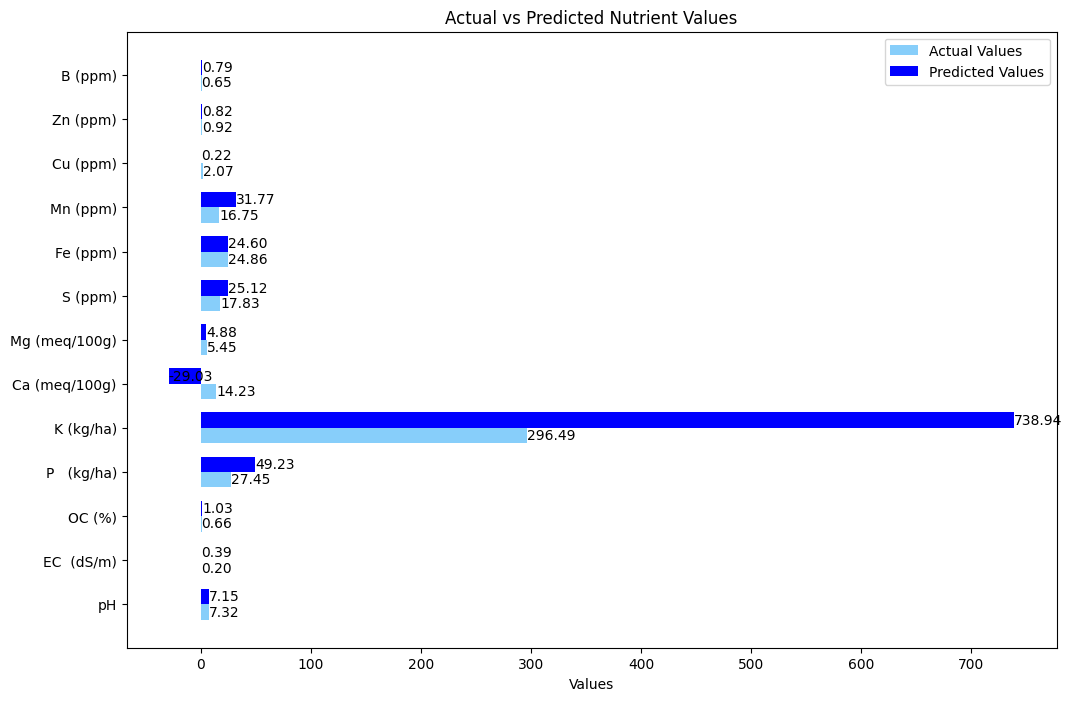

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors


# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler.transform(df2)
prediction = multioutput_model.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()


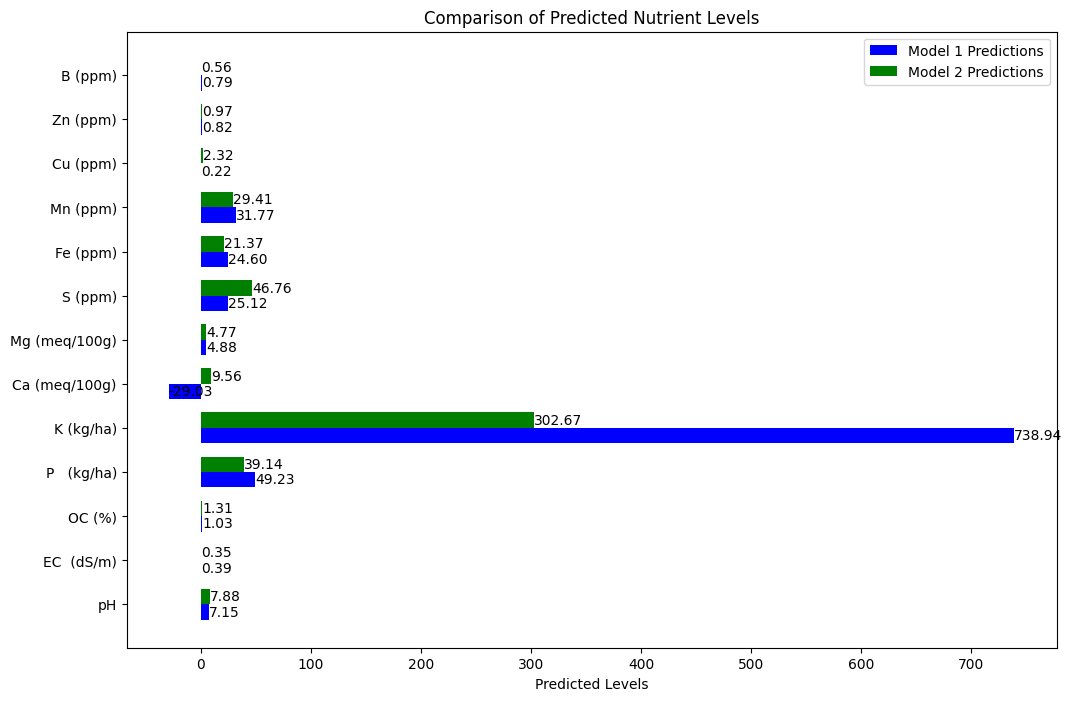

In [31]:
#increase the datasets
#plot comparison between rf and elasticnet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler.transform(df2)

# Predictions from both models
predictions_model1 = multioutput_model.predict(scaled_input)
predictions_model2 = multioutput_rfr.predict(scaled_input)

# Prepare data for plotting
predicted_values_model1 = {col: predictions_model1[0][i] for i, col in enumerate(target_columns)}
predicted_values_model2 = {col: predictions_model2[0][i] for i, col in enumerate(target_columns)}

# Plot comparison bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))

# Plotting both model predictions
bars1 = ax.barh(indices - bar_width/2, list(predicted_values_model1.values()), bar_width, label='Model 1 Predictions', color='b')
bars2 = ax.barh(indices + bar_width/2, list(predicted_values_model2.values()), bar_width, label='Model 2 Predictions', color='g')

# Adding labels and title
ax.set_xlabel('Predicted Levels')
ax.set_yticks(indices)
ax.set_yticklabels(target_columns)
ax.set_title('Comparison of Predicted Nutrient Levels')
ax.legend()

# Adding values to the bars
for bars, predicted_values in zip([bars1, bars2], [predicted_values_model1, predicted_values_model2]):
    for bar, value in zip(bars, predicted_values.values()):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()


In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Decision Tree Regressor model for multiple target variables
dtr = DecisionTreeRegressor(random_state=42)

# Wrap Decision Tree Regressor in MultiOutputRegressor to handle multiple outputs
multioutput_dtr = MultiOutputRegressor(dtr)

# Fit the Decision Tree Regressor model
multioutput_dtr.fit(X_train, y_train)

# Predict for the test set
y_pred_dtr = multioutput_dtr.predict(X_test)
y_pred_train_dtr = multioutput_dtr.predict(X_train)

# Calculate performance metrics
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
r2_train_dtr = r2_score(y_train, y_pred_train_dtr)

print("Decision Tree Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_dtr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_dtr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dtr:.4f}")
print(f"R² Score: {r2_dtr:.4f}")
print(f"R² Score on Training Data: {r2_train_dtr:.4f}")


Decision Tree Regressor Performance Metrics:
Mean Squared Error (MSE): 1239.4531
Mean Absolute Error (MAE): 4.4554
Root Mean Squared Error (RMSE): 35.2059
R² Score: 0.7208
R² Score on Training Data: 0.9823


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Linear Regression model for multiple target variables
lr = LinearRegression()

# Wrap Linear Regression in MultiOutputRegressor to handle multiple outputs
multioutput_lr = MultiOutputRegressor(lr)

# Fit the Linear Regression model
multioutput_lr.fit(X_train, y_train)

# Predict for the test set
y_pred_lr = multioutput_lr.predict(X_test)
y_pred_train_lr = multioutput_lr.predict(X_train)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)

print("Multi-Target Linear Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")
print(f"R² Score on Training Data: {r2_train_lr:.4f}")


Multi-Target Linear Regression Performance Metrics:
Mean Squared Error (MSE): 2109.9184
Mean Absolute Error (MAE): 15.3152
Root Mean Squared Error (RMSE): 45.9338
R² Score: 0.0742
R² Score on Training Data: 0.1925


In [34]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso = Lasso()

# Fit the model
lasso.fit(X_train, y_train)

# Predict for the test set
y_pred_lasso = lasso.predict(X_test)
y_pred_train_lasso = lasso.predict(X_train)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)

print("Lasso Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_lasso:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lasso:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")
print(f"R² Score on Training Data: {r2_train_lasso:.4f}")


Lasso Regression Performance Metrics:
Mean Squared Error (MSE): 2114.2395
Mean Absolute Error (MAE): 15.3684
Root Mean Squared Error (RMSE): 45.9809
R² Score: 0.0508
R² Score on Training Data: 0.1637


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train Linear Regression model for multiple target variables
lr = LinearRegression()

# Wrap Linear Regression in MultiOutputRegressor to handle multiple outputs
multioutput_lr = MultiOutputRegressor(lr)

# Fit the Linear Regression model
multioutput_lr.fit(X_train, y_train)

# Predict for the test set
y_pred_lr = multioutput_lr.predict(X_test)
y_pred_train_lr = multioutput_lr.predict(X_train)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)

print("Multi-Target Linear Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")
print(f"R² Score on Training Data: {r2_train_lr:.4f}")


Multi-Target Linear Regression Performance Metrics:
Mean Squared Error (MSE): 2109.9184
Mean Absolute Error (MAE): 15.3152
Root Mean Squared Error (RMSE): 45.9338
R² Score: 0.0742
R² Score on Training Data: 0.1925


In [36]:
from sklearn.svm import SVR

# Train Support Vector Regressor model for multiple target variables
svr = SVR()

# Wrap SVR in MultiOutputRegressor to handle multiple outputs
multioutput_svr = MultiOutputRegressor(svr)

# Fit the SVR model
multioutput_svr.fit(X_train, y_train)

# Predict for the test set
y_pred_svr = multioutput_svr.predict(X_test)
y_pred_train_svr = multioutput_svr.predict(X_train)

# Calculate performance metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)

print("Multi-Target Support Vector Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")
print(f"R² Score on Training Data: {r2_train_svr:.4f}")


Multi-Target Support Vector Regressor Performance Metrics:
Mean Squared Error (MSE): 2412.8228
Mean Absolute Error (MAE): 16.0406
Root Mean Squared Error (RMSE): 49.1205
R² Score: -0.0638
R² Score on Training Data: -0.0092


# Best Performer- GradientBoostingRegressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor model for multiple target variables
gbr = GradientBoostingRegressor(random_state=42)

# Wrap GBR in MultiOutputRegressor to handle multiple outputs
multioutput_gbr = MultiOutputRegressor(gbr)

# Fit the GBR model
multioutput_gbr.fit(X_train, y_train)

# Predict for the test set
y_pred_gbr = multioutput_gbr.predict(X_test)
y_pred_train_gbr = multioutput_gbr.predict(X_train)

# Calculate performance metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
r2_train_gbr = r2_score(y_train, y_pred_train_gbr)

print("Multi-Target Gradient Boosting Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.4f}")
print(f"R² Score: {r2_gbr:.4f}")
print(f"R² Score on Training Data: {r2_train_gbr:.4f}")

Multi-Target Gradient Boosting Regressor Performance Metrics:
Mean Squared Error (MSE): 663.9385
Mean Absolute Error (MAE): 5.7725
Root Mean Squared Error (RMSE): 25.7670
R² Score: 0.8064
R² Score on Training Data: 0.9688


In [25]:
#knn , cnn, dl models, ann, rnn;

KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train K-Nearest Neighbors Regressor model for multiple target variables
knn = KNeighborsRegressor()

# Wrap KNN in MultiOutputRegressor to handle multiple outputs
multioutput_knn = MultiOutputRegressor(knn)

# Fit the KNN model
multioutput_knn.fit(X_train, y_train)

# Predict for the test set
y_pred_knn = multioutput_knn.predict(X_test)
y_pred_train_knn = multioutput_knn.predict(X_train)

# Calculate performance metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

print("Multi-Target K-Nearest Neighbors Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")
print(f"R² Score on Training Data: {r2_train_knn:.4f}")


Multi-Target K-Nearest Neighbors Regressor Performance Metrics:
Mean Squared Error (MSE): 2528.2407
Mean Absolute Error (MAE): 15.9422
Root Mean Squared Error (RMSE): 50.2816
R² Score: 0.0395
R² Score on Training Data: 0.4038


KNN - hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the KNN regressor
knn = KNeighborsRegressor()

# Wrap KNN in MultiOutputRegressor to handle multiple outputs
multioutput_knn = MultiOutputRegressor(knn)

# Define the hyperparameter grid
param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 9, 11],       # Number of neighbors
    'estimator__weights': ['uniform', 'distance'],    # Weighting of neighbors
    'estimator__metric': ['euclidean', 'manhattan']   # Distance metric
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(multioutput_knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Predict for the test set using the best model
y_pred_knn = best_knn.predict(X_test)
y_pred_train_knn = best_knn.predict(X_train)

# Calculate performance metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

# Output the best parameters found and model performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Multi-Target K-Nearest Neighbors Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")
print(f"R² Score on Training Data: {r2_train_knn:.4f}")


Best Hyperparameters: {'estimator__metric': 'euclidean', 'estimator__n_neighbors': 11, 'estimator__weights': 'distance'}
Multi-Target K-Nearest Neighbors Regressor Performance Metrics:
Mean Squared Error (MSE): 699.0999
Mean Absolute Error (MAE): 3.5003
Root Mean Squared Error (RMSE): 26.4405
R² Score: 0.8256
R² Score on Training Data: 0.9823


 Feedforward Neural Network (Dense Network)

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define model
model = Sequential()

# Input layer (number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout to avoid overfitting
model.add(Dense(64, activation='relu'))

# Output layer (number of target variables)
model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

print(f"RMSE: {rmse:.4f}, R² (Test): {r2:.4f}, R² (Train): {r2_train:.4f}")


KeyboardInterrupt: 

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a basic ANN model
model = Sequential()

# Input layer and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

# Output layer (for multiple target variables)
model.add(Dense(y_train.shape[1]))  # Outputs the predictions for multiple targets

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)




Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 10225.7725 - val_loss: 9245.7090
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11379.6885 - val_loss: 9146.9111
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11068.2705 - val_loss: 8928.4561
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12436.8105 - val_loss: 8475.7061
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9316.5215 - val_loss: 7651.5264
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9146.8467 - val_loss: 6395.6260
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7274.2603 - val_loss: 4860.4937
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5039.9131 - val_loss: 3442.4055
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4721.8359 - val_loss: 2850.6792
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4361.1670 - val_loss: 2783.4565
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5419.4092 - val_loss: 27

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set and training set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate performance metrics for test data
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Calculate performance metrics for training data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the performance metrics
print("Performance Metrics for ANN Model:")
print(f"Test Data:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R² Score: {r2_test:.4f}")

print("\nTraining Data:")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"R² Score: {r2_train:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Performance Metrics for ANN Model:
Test Data:
Mean Squared Error (MSE): 2010.5065
Root Mean Squared Error (RMSE): 44.8387
Mean Absolute Error (MAE): 14.8285
R² Score: -0.4909

Training Data:
Mean Squared Error (MSE): 2026.1304
Root Mean Squared Error (RMSE): 45.0126
Mean Absolute Error (MAE): 14.1957
R² Score: -0.2946


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Reshape input data for RNN (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=2)  # Adding the time step dimension
X_test_rnn = np.expand_dims(X_test, axis=2)

# Build the RNN (LSTM) model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_rnn.shape[1], 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

# Output layer (for multiple target variables)
model.add(Dense(y_train.shape[1]))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_rnn, y_train, validation_data=(X_test_rnn, y_test), epochs=100, batch_size=16)

# Predict on the test and training data
y_pred_test_rnn = model.predict(X_test_rnn)
y_pred_train_rnn = model.predict(X_train_rnn)

# Calculate performance metrics for test data
mse_test_rnn = mean_squared_error(y_test, y_pred_test_rnn)
rmse_test_rnn = np.sqrt(mse_test_rnn)
mae_test_rnn = mean_absolute_error(y_test, y_pred_test_rnn)
r2_test_rnn = r2_score(y_test, y_pred_test_rnn)

# Calculate performance metrics for training data
mse_train_rnn = mean_squared_error(y_train, y_pred_train_rnn)
rmse_train_rnn = np.sqrt(mse_train_rnn)
mae_train_rnn = mean_absolute_error(y_train, y_pred_train_rnn)
r2_train_rnn = r2_score(y_train, y_pred_train_rnn)

# Output the performance metrics
print("RNN (LSTM) Performance Metrics:")
print(f"Test Data:")
print(f"Mean Squared Error (MSE): {mse_test_rnn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_rnn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_rnn:.4f}")
print(f"R² Score: {r2_test_rnn:.4f}")

print("\nTraining Data:")
print(f"Mean Squared Error (MSE): {mse_train_rnn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_rnn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_rnn:.4f}")
print(f"R² Score: {r2_train_rnn:.4f}")


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 11598.8506 - val_loss: 9281.6865
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 10583.6846 - val_loss: 9128.4287
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 12047.6729 - val_loss: 8937.7041
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9326.5986 - val_loss: 8796.2119
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10648.5078 - val_loss: 8714.3213
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11280.1611 - val_loss: 8659.6748
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10743.4639 - val_loss: 8614.4014
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9913.0752 - val_loss: 8572.6309
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9708.5322 - val_loss: 8533.4072
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 10450.7920 - val_loss: 8495.2920
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10175.8262

In [52]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels here

# Wrap SVR in MultiOutputRegressor
multioutput_svr = MultiOutputRegressor(svr_model)

# Fit the model on the training data
multioutput_svr.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = multioutput_svr.predict(X_test)
y_pred_train_svr = multioutput_svr.predict(X_train)

# Calculate performance metrics for test data
mse_test_svr = mean_squared_error(y_test, y_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_svr)
r2_test_svr = r2_score(y_test, y_pred_svr)

# Calculate performance metrics for training data
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
r2_train_svr = r2_score(y_train, y_pred_train_svr)

# Output the performance metrics
print("Support Vector Regressor Performance Metrics:")
print(f"Test Data:")
print(f"Mean Squared Error (MSE): {mse_test_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test_svr:.4f}")
print(f"R² Score: {r2_test_svr:.4f}")

print("\nTraining Data:")
print(f"Mean Squared Error (MSE): {mse_train_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train_svr:.4f}")
print(f"R² Score: {r2_train_svr:.4f}")


Support Vector Regressor Performance Metrics:
Test Data:
Mean Squared Error (MSE): 2393.6746
Root Mean Squared Error (RMSE): 48.9252
Mean Absolute Error (MAE): 15.7237
R² Score: 0.0805

Training Data:
Mean Squared Error (MSE): 3140.1814
Root Mean Squared Error (RMSE): 56.0373
Mean Absolute Error (MAE): 15.9599
R² Score: 0.1355


ADABOOST (Adaptive Boosting) ENSEMBLE LEARNING

In [27]:

import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

base_model = DecisionTreeRegressor(max_depth=3)

# Initialize the AdaBoost model without hyperparameter tuning
adaboost_model = AdaBoostRegressor(estimator=base_model, random_state=42)

# Wrap AdaBoost in MultiOutputRegressor
multioutput_adaboost = MultiOutputRegressor(adaboost_model)

# Fit the model
multioutput_adaboost.fit(X_train, y_train)

# Make predictions using the model
y_pred_adaboost = multioutput_adaboost.predict(X_test)
y_pred_train_adaboost = multioutput_adaboost.predict(X_train)

# Calculate performance metrics for test data
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Calculate performance metrics for training data
r2_train_adaboost = r2_score(y_train, y_pred_train_adaboost)

# Output the performance metrics
print("Multi-Target AdaBoost Regressor Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_adaboost:.4f}")
print(f"Mean Absolute Error (MAE): {mae_adaboost:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_adaboost:.4f}")
print(f"R² Score: {r2_adaboost:.4f}")
print(f"R² Score on Training Data: {r2_train_adaboost:.4f}")


Multi-Target AdaBoost Regressor Performance Metrics:
Mean Squared Error (MSE): 1170.9062
Mean Absolute Error (MAE): 11.3018
Root Mean Squared Error (RMSE): 34.2185
R² Score: 0.5324
R² Score on Training Data: 0.7338


In [28]:
all_regressors = ['Gradient Boosting', 'AdaBoost', 'KNN','Decision Tree']
all_mse = [mse_gbr, mse_adaboost, mse_knn,mse_dtr]
all_mae = [ mae_gbr, mae_adaboost,mae_knn, mae_dtr]
all_rmse = [rmse_gbr, rmse_adaboost, rmse_knn, rmse_dtr]
all_r2_test = [ r2_gbr, r2_adaboost, r2_knn, r2_dtr]
all_r2_train = [ r2_train_gbr,r2_train_adaboost, r2_train_knn, r2_train_dtr]

In [29]:
compare_df = pd.DataFrame({'Regressor':all_regressors, 'MSE':all_mse, 'MAE': all_mae, 'RMSE': all_rmse, 'R2 Train': all_r2_train, 'R2 Test': all_r2_test })

In [30]:
compare_df.sort_values(by=['R2 Train'], ascending=False)

Regressor          MSE        MAE       RMSE  R2 Train   R2 Test
3      Decision Tree  1239.453096   4.455412  35.205867  0.982259  0.720791
2                KNN   699.099851   3.500281  26.440496  0.982259  0.825556
0  Gradient Boosting   663.938451   5.772466  25.767003  0.968790  0.806441
1           AdaBoost  1170.906238  11.301827  34.218507  0.733843  0.532357

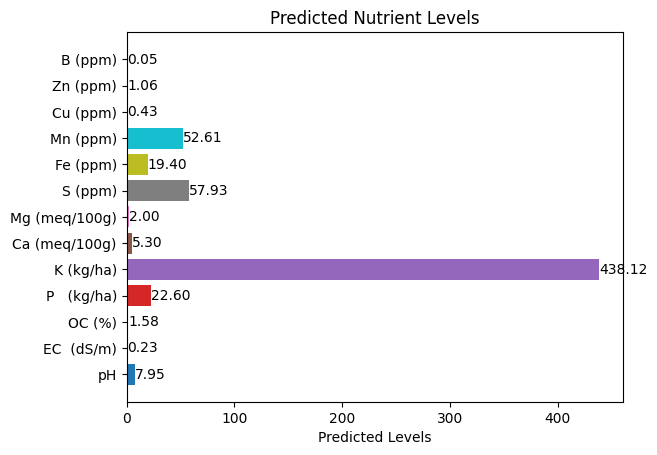

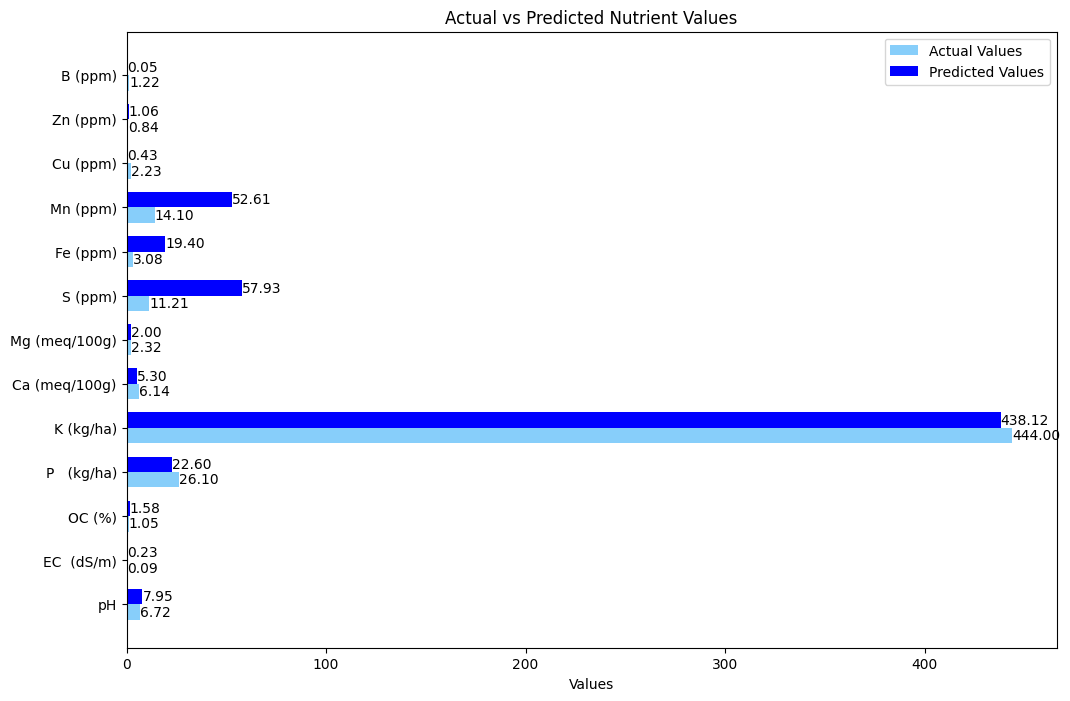

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [2429],
    'B(435)': [1108],
    'C(460)': [2091],
    'D(485)': [737],
    'E(510)': [835],
    'F(535)': [1376],
    'G(560)': [322],
    'H(585)': [318],
    'R(610)': [1305],
    'I(645)': [163],
    'S(680)': [332],
    'J(705)': [51],
    'U(760)': [76],
    'V(810)': [237],
    'W(860)': [305],
    'K(900)': [60],
    'L(940)': [38],
    'T(730)': [84]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df


df2 = preprocess_input_data(data)
scaled_input = scaler.transform(df2)
prediction = multioutput_dtr.predict(scaled_input)

# Target columns
target_columns = ['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 'Ca (meq/100g)', 
                  'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)']

# Replace this with actual values for the specific test point
y_test_actual = [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22]

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))

# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test_actual, bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()


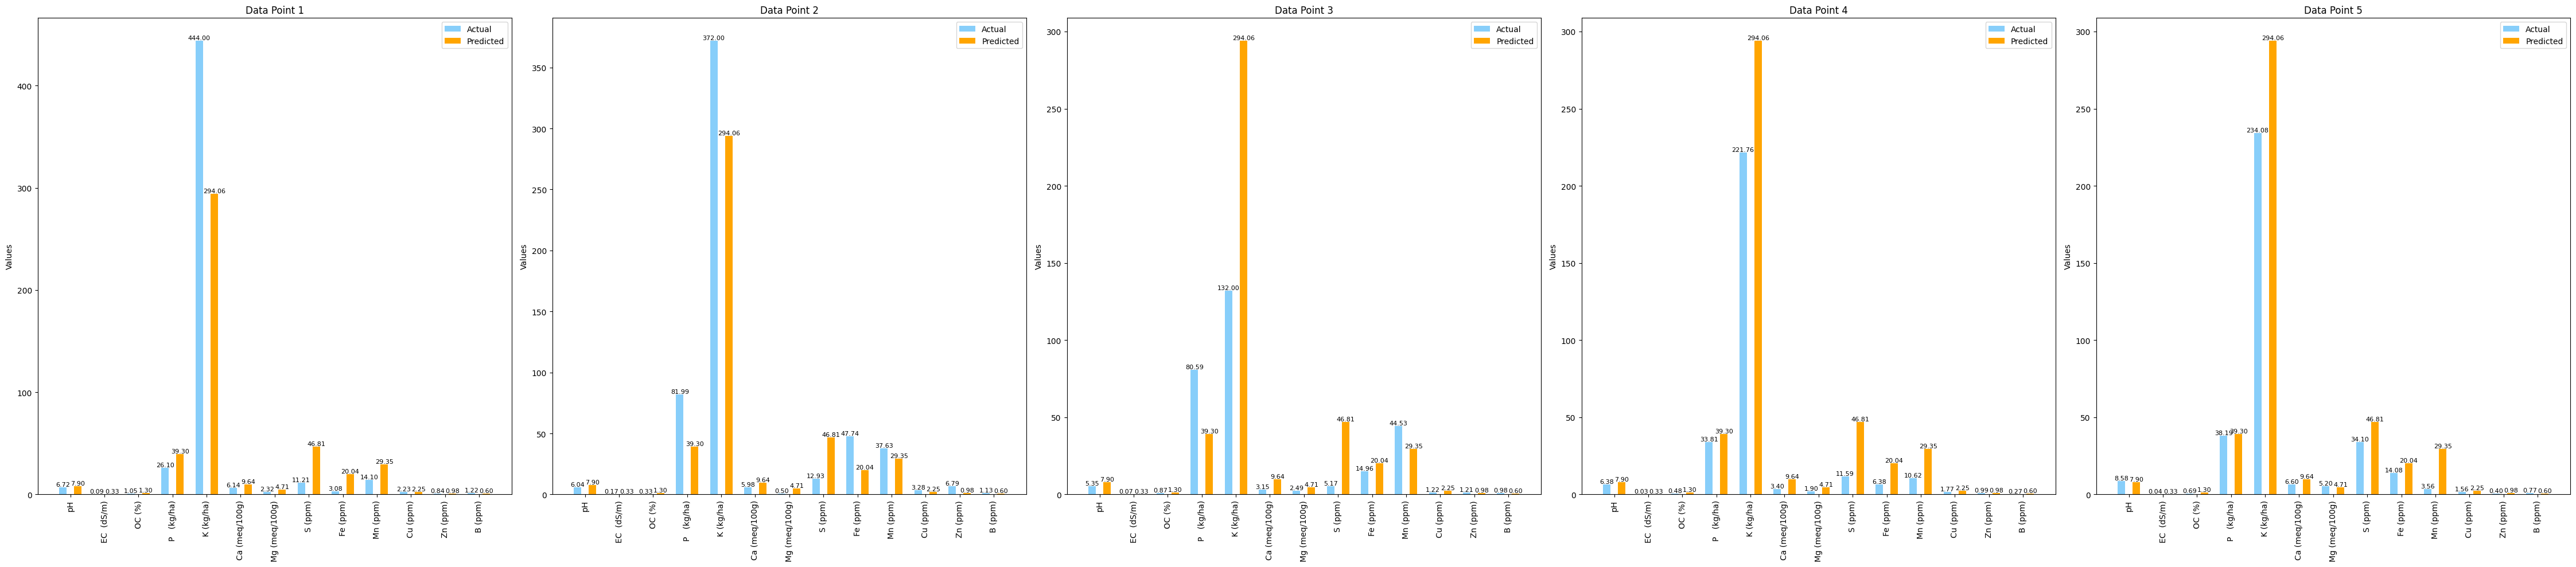

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_rfr` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_rfr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point
plt.figure(figsize=(45, 10))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    bar_width = 0.22  # Reduced bar width for more spacing
    indices = np.arange(len(actual_df.columns))
    
    # Plot actual and predicted values side-by-side with added spacing
    actual_bars = plt.bar(indices - bar_width, actual_df.iloc[i], width=bar_width, label='Actual', color='lightskyblue')
    predicted_bars = plt.bar(indices + bar_width, predicted_df.iloc[i], width=bar_width, label='Predicted', color='orange')
    
    plt.xticks(indices, actual_df.columns, rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each bar with adjusted position for better readability
    for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
        plt.text(actual_bar.get_x() + actual_bar.get_width() / 2, actual_bar.get_height(),
                 f'{actual_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
        plt.text(predicted_bar.get_x() + predicted_bar.get_width() / 2, predicted_bar.get_height(),
                 f'{predicted_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


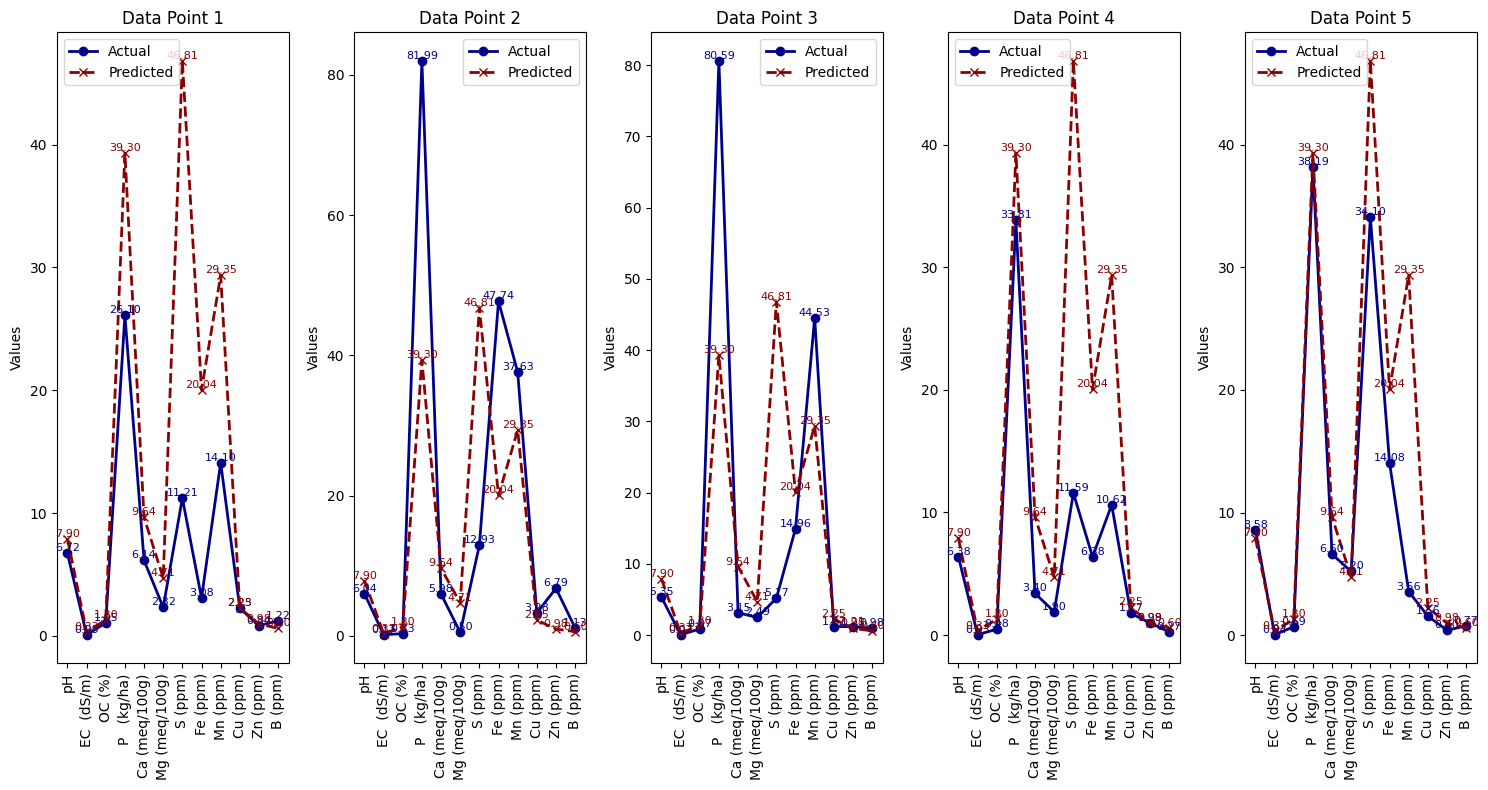

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    294.0627
1    294.0627
2    294.0627
3    294.0627
4    294.0627
Name: K (kg/ha), dtype: float64


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_rfr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)


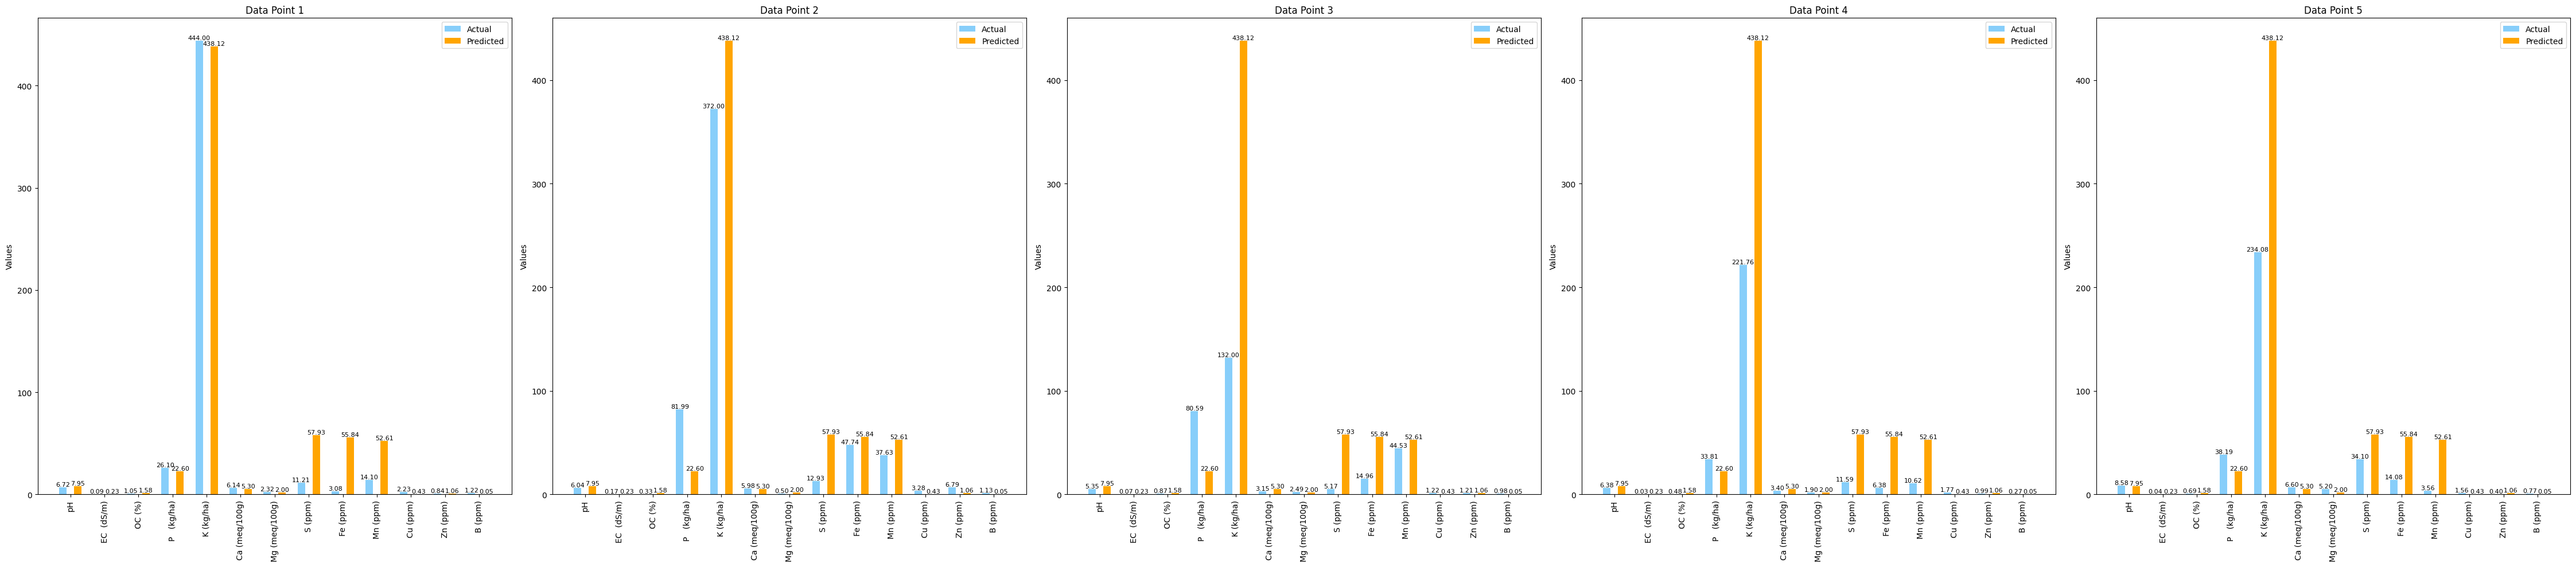

In [47]:
#multioutput_dtr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_rfr` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_dtr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point
plt.figure(figsize=(45, 10))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    bar_width = 0.22  # Reduced bar width for more spacing
    indices = np.arange(len(actual_df.columns))
    
    # Plot actual and predicted values side-by-side with added spacing
    actual_bars = plt.bar(indices - bar_width, actual_df.iloc[i], width=bar_width, label='Actual', color='lightskyblue')
    predicted_bars = plt.bar(indices + bar_width, predicted_df.iloc[i], width=bar_width, label='Predicted', color='orange')
    
    plt.xticks(indices, actual_df.columns, rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each bar with adjusted position for better readability
    for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
        plt.text(actual_bar.get_x() + actual_bar.get_width() / 2, actual_bar.get_height(),
                 f'{actual_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
        plt.text(predicted_bar.get_x() + predicted_bar.get_width() / 2, predicted_bar.get_height(),
                 f'{predicted_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


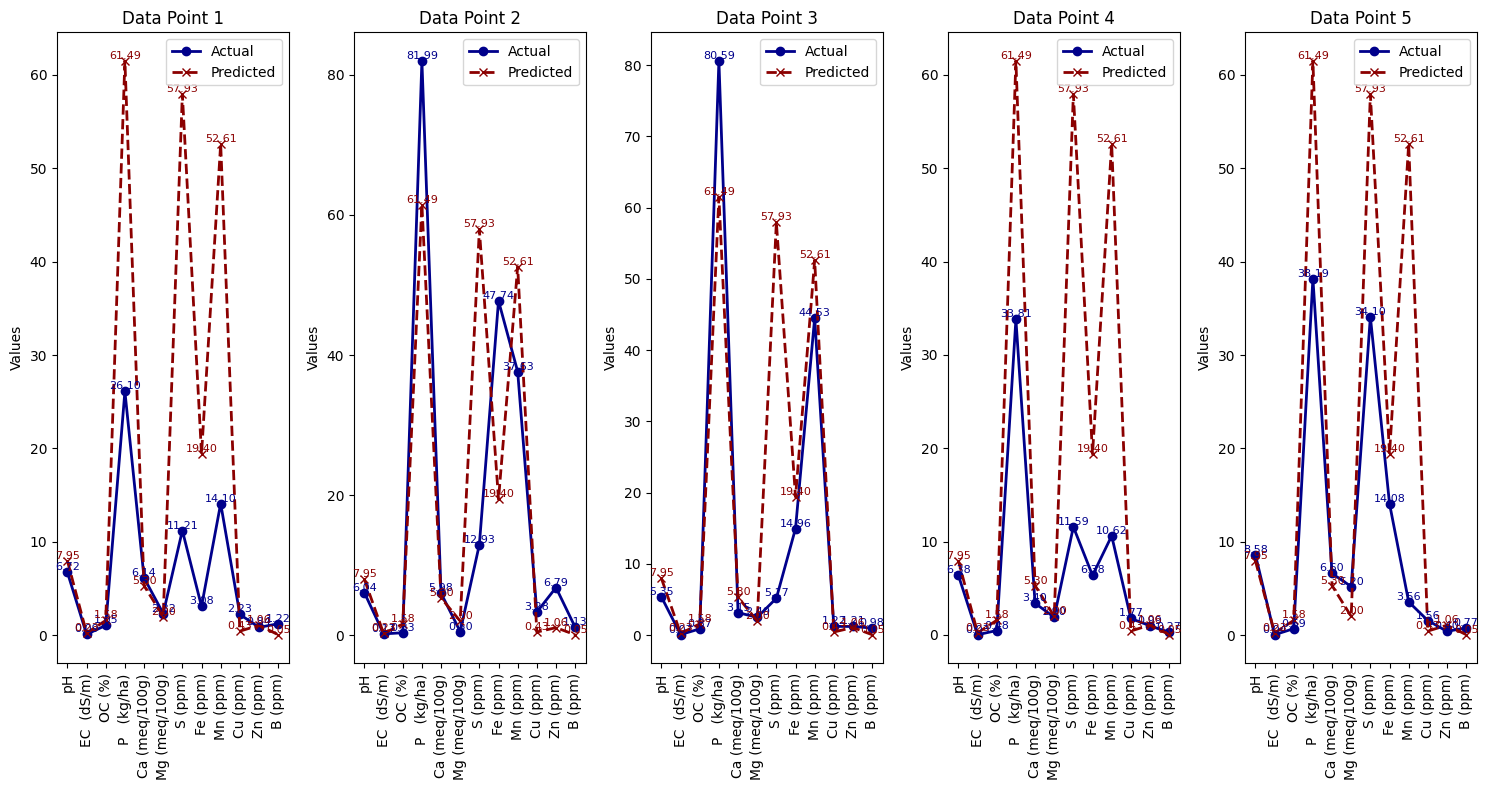

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    438.12
1    438.12
2    438.12
3    438.12
4    438.12
Name: K (kg/ha), dtype: float64


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_dtr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)


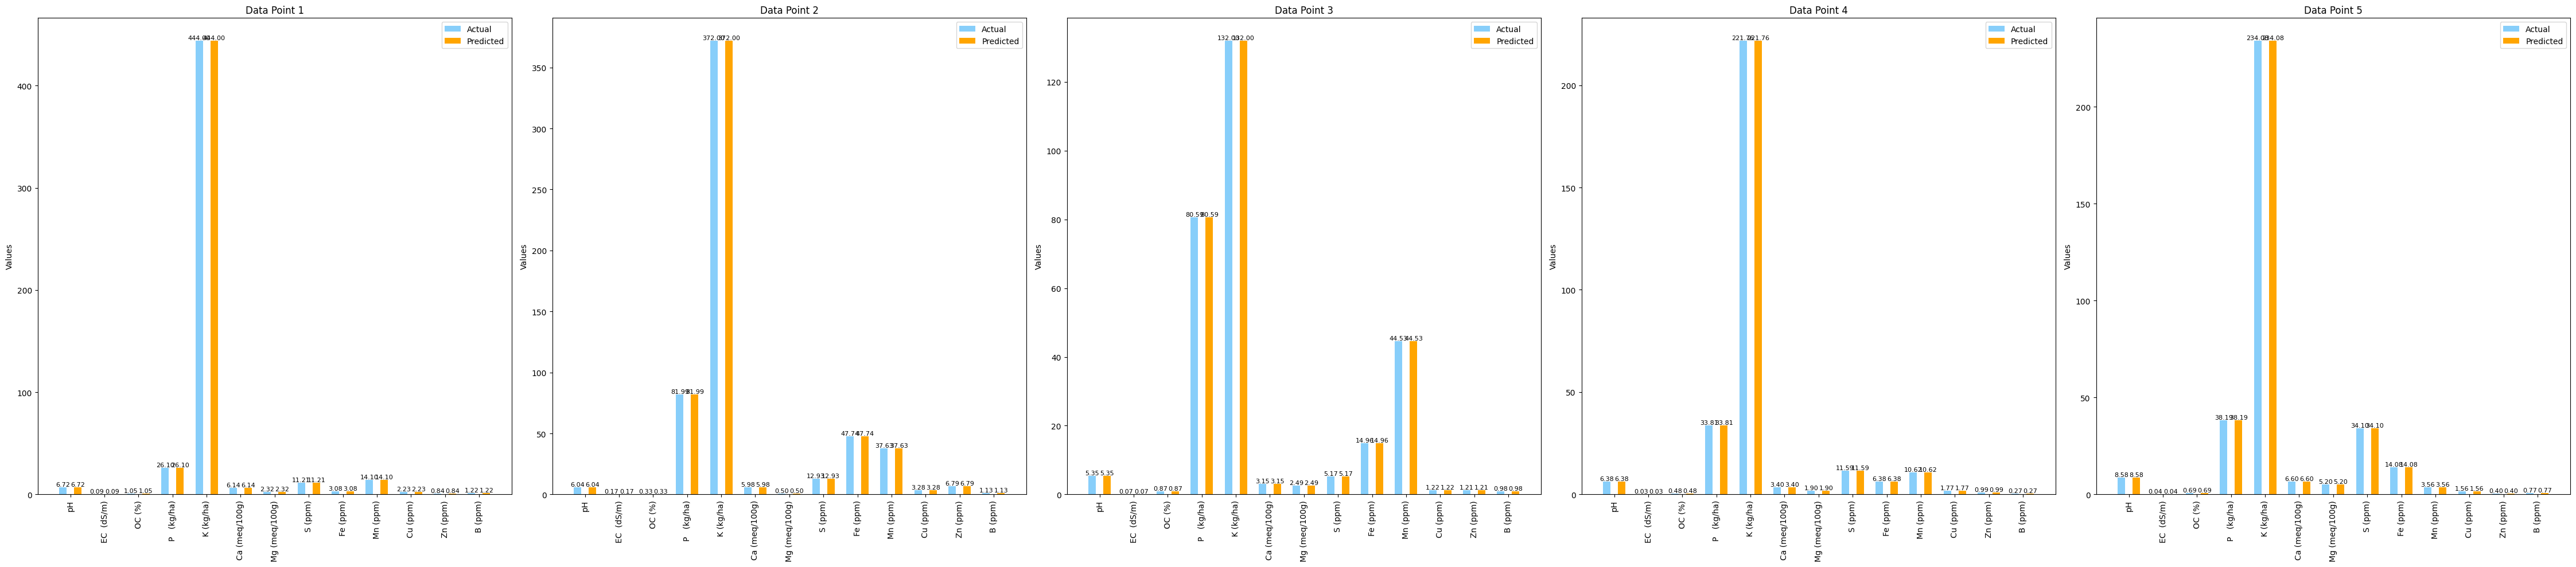

In [59]:
#knn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_rfr` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = best_knn.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point
plt.figure(figsize=(45, 10))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    bar_width = 0.22  # Reduced bar width for more spacing
    indices = np.arange(len(actual_df.columns))
    
    # Plot actual and predicted values side-by-side with added spacing
    actual_bars = plt.bar(indices - bar_width, actual_df.iloc[i], width=bar_width, label='Actual', color='lightskyblue')
    predicted_bars = plt.bar(indices + bar_width, predicted_df.iloc[i], width=bar_width, label='Predicted', color='orange')
    
    plt.xticks(indices, actual_df.columns, rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each bar with adjusted position for better readability
    for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
        plt.text(actual_bar.get_x() + actual_bar.get_width() / 2, actual_bar.get_height(),
                 f'{actual_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
        plt.text(predicted_bar.get_x() + predicted_bar.get_width() / 2, predicted_bar.get_height(),
                 f'{predicted_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


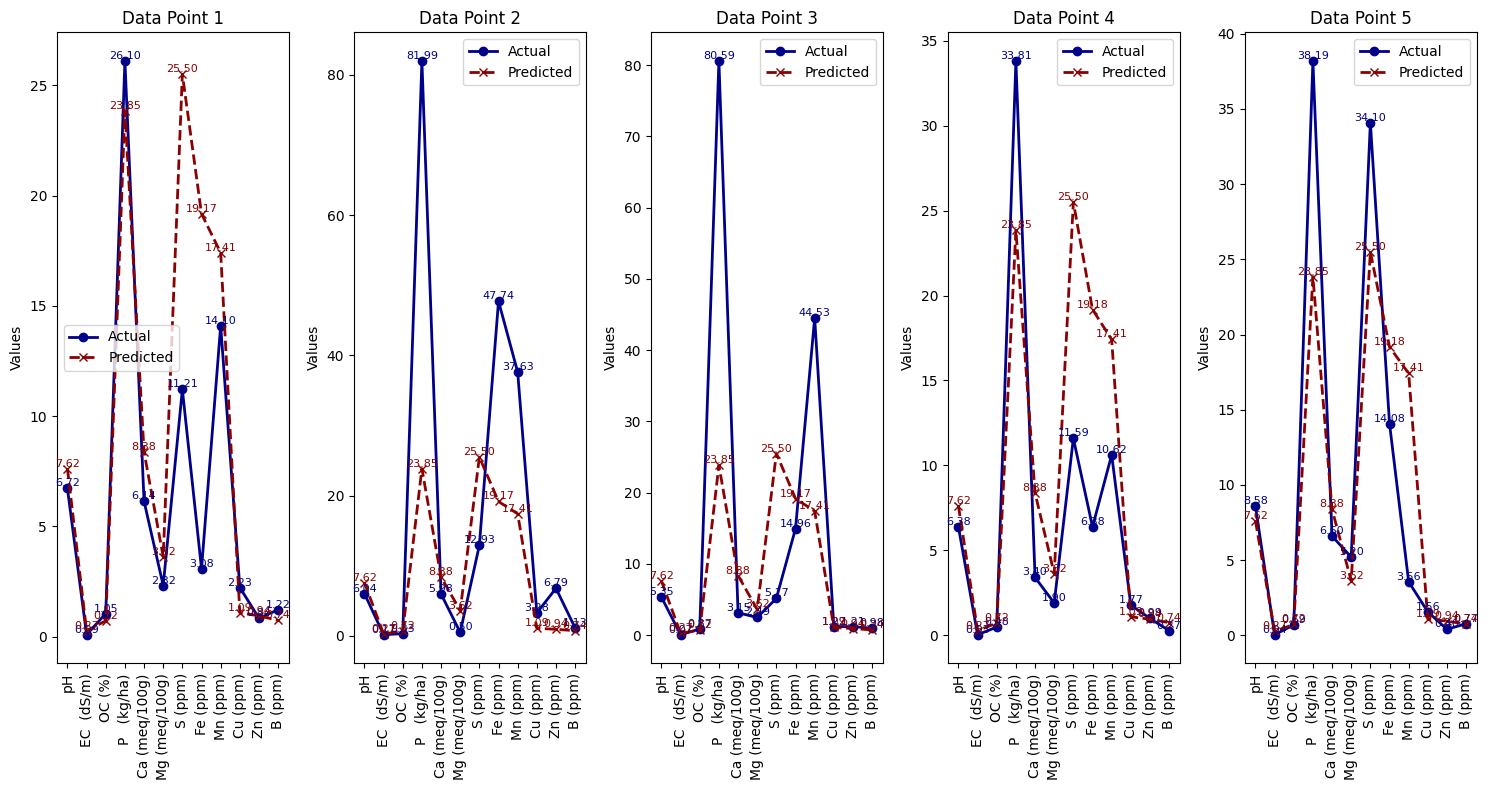

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    380.362655
1    380.364277
2    380.359866
3    380.368646
4    380.385198
Name: K (kg/ha), dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = best_knn.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)


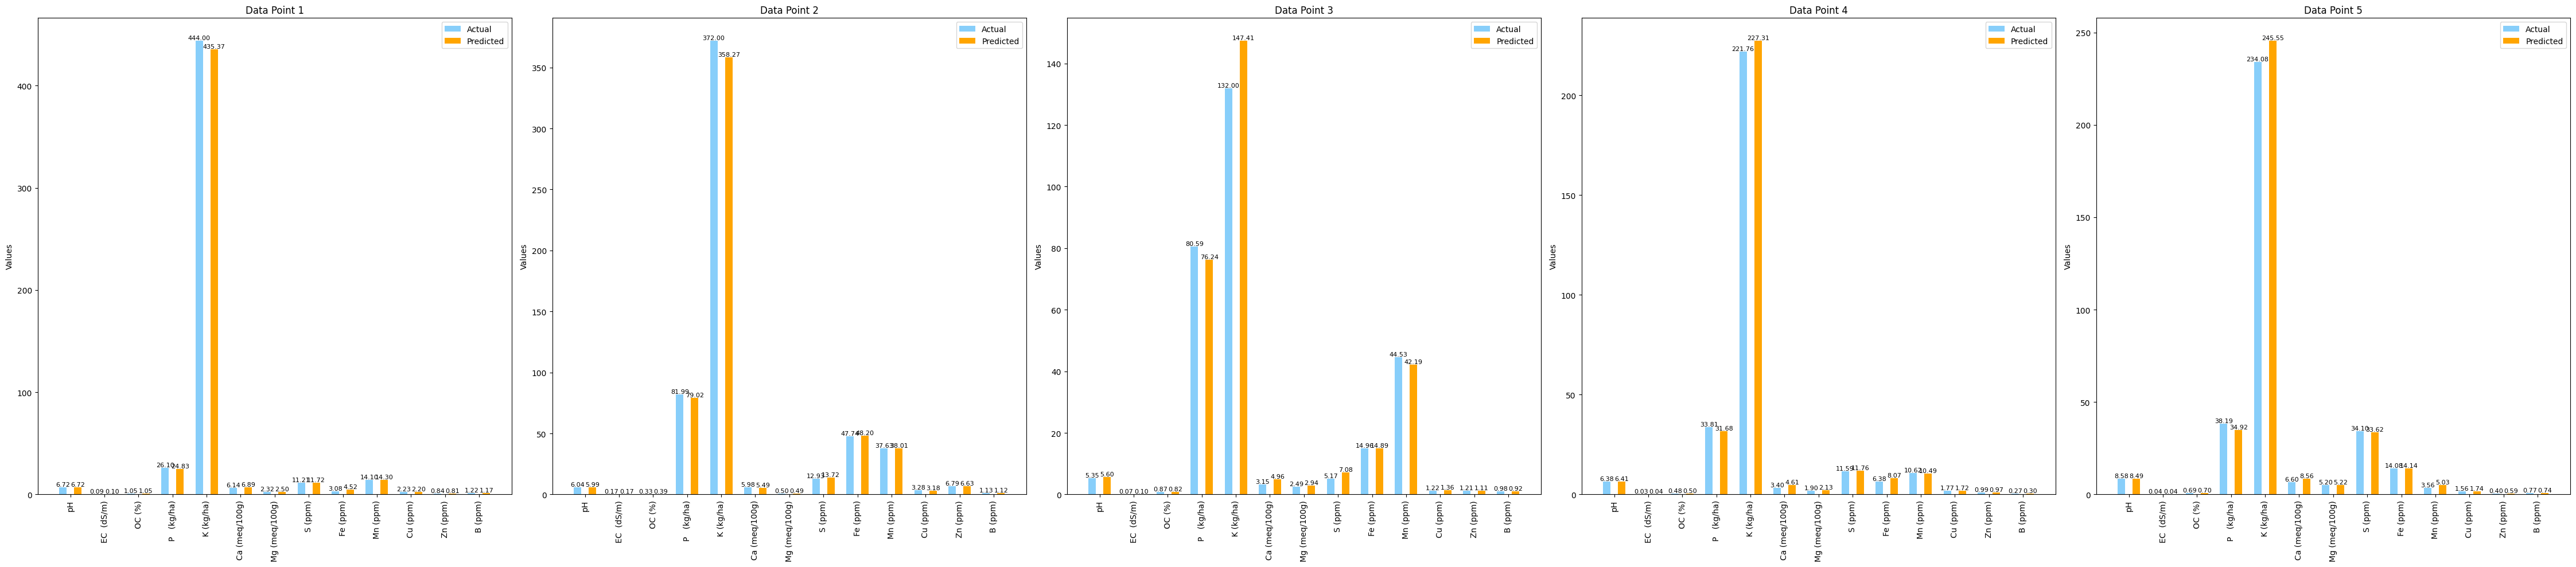

In [60]:
#gbr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_rfr` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_gbr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point
plt.figure(figsize=(45, 10))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    bar_width = 0.22  # Reduced bar width for more spacing
    indices = np.arange(len(actual_df.columns))
    
    # Plot actual and predicted values side-by-side with added spacing
    actual_bars = plt.bar(indices - bar_width, actual_df.iloc[i], width=bar_width, label='Actual', color='lightskyblue')
    predicted_bars = plt.bar(indices + bar_width, predicted_df.iloc[i], width=bar_width, label='Predicted', color='orange')
    
    plt.xticks(indices, actual_df.columns, rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each bar with adjusted position for better readability
    for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
        plt.text(actual_bar.get_x() + actual_bar.get_width() / 2, actual_bar.get_height(),
                 f'{actual_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
        plt.text(predicted_bar.get_x() + predicted_bar.get_width() / 2, predicted_bar.get_height(),
                 f'{predicted_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


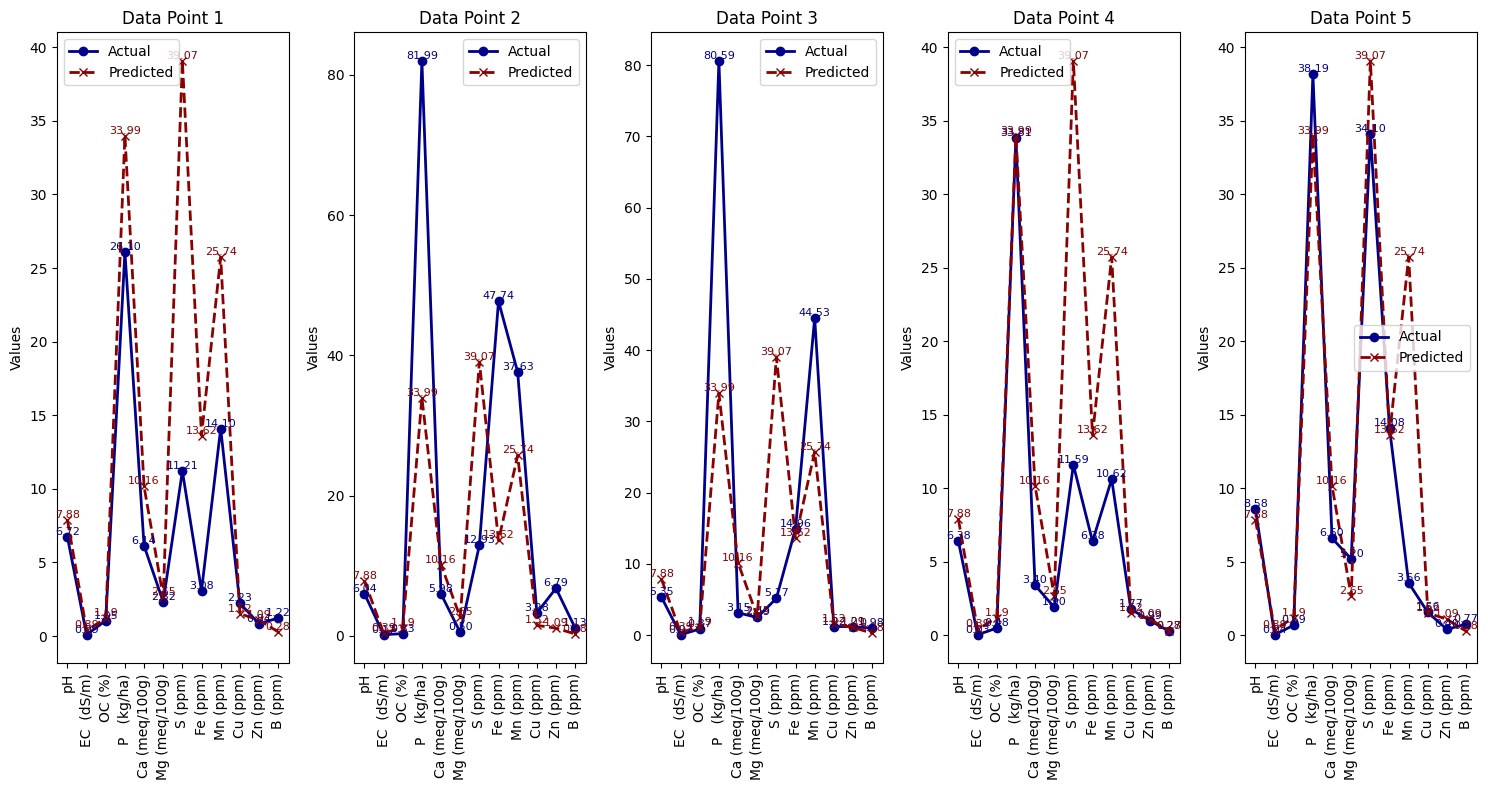

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    341.279203
1    341.279203
2    341.279203
3    341.279203
4    341.279203
Name: K (kg/ha), dtype: float64


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_gbr.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)


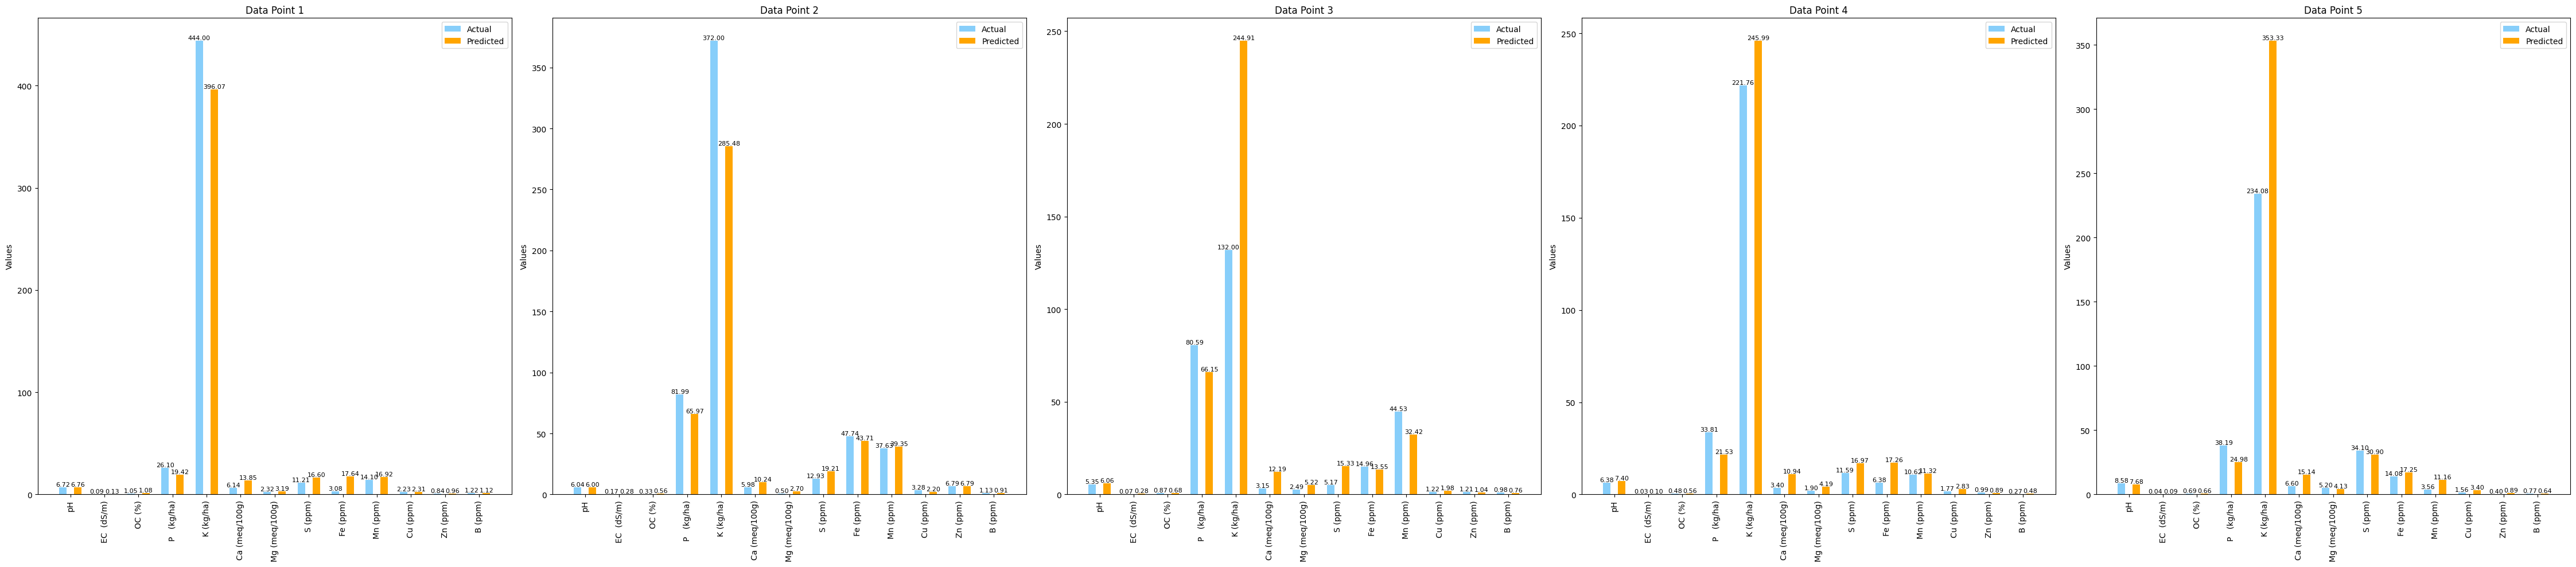

In [61]:
#adaboost
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_rfr` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_adaboost.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point
plt.figure(figsize=(45, 10))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    bar_width = 0.22  # Reduced bar width for more spacing
    indices = np.arange(len(actual_df.columns))
    
    # Plot actual and predicted values side-by-side with added spacing
    actual_bars = plt.bar(indices - bar_width, actual_df.iloc[i], width=bar_width, label='Actual', color='lightskyblue')
    predicted_bars = plt.bar(indices + bar_width, predicted_df.iloc[i], width=bar_width, label='Predicted', color='orange')
    
    plt.xticks(indices, actual_df.columns, rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each bar with adjusted position for better readability
    for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
        plt.text(actual_bar.get_x() + actual_bar.get_width() / 2, actual_bar.get_height(),
                 f'{actual_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
        plt.text(predicted_bar.get_x() + predicted_bar.get_width() / 2, predicted_bar.get_height(),
                 f'{predicted_bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


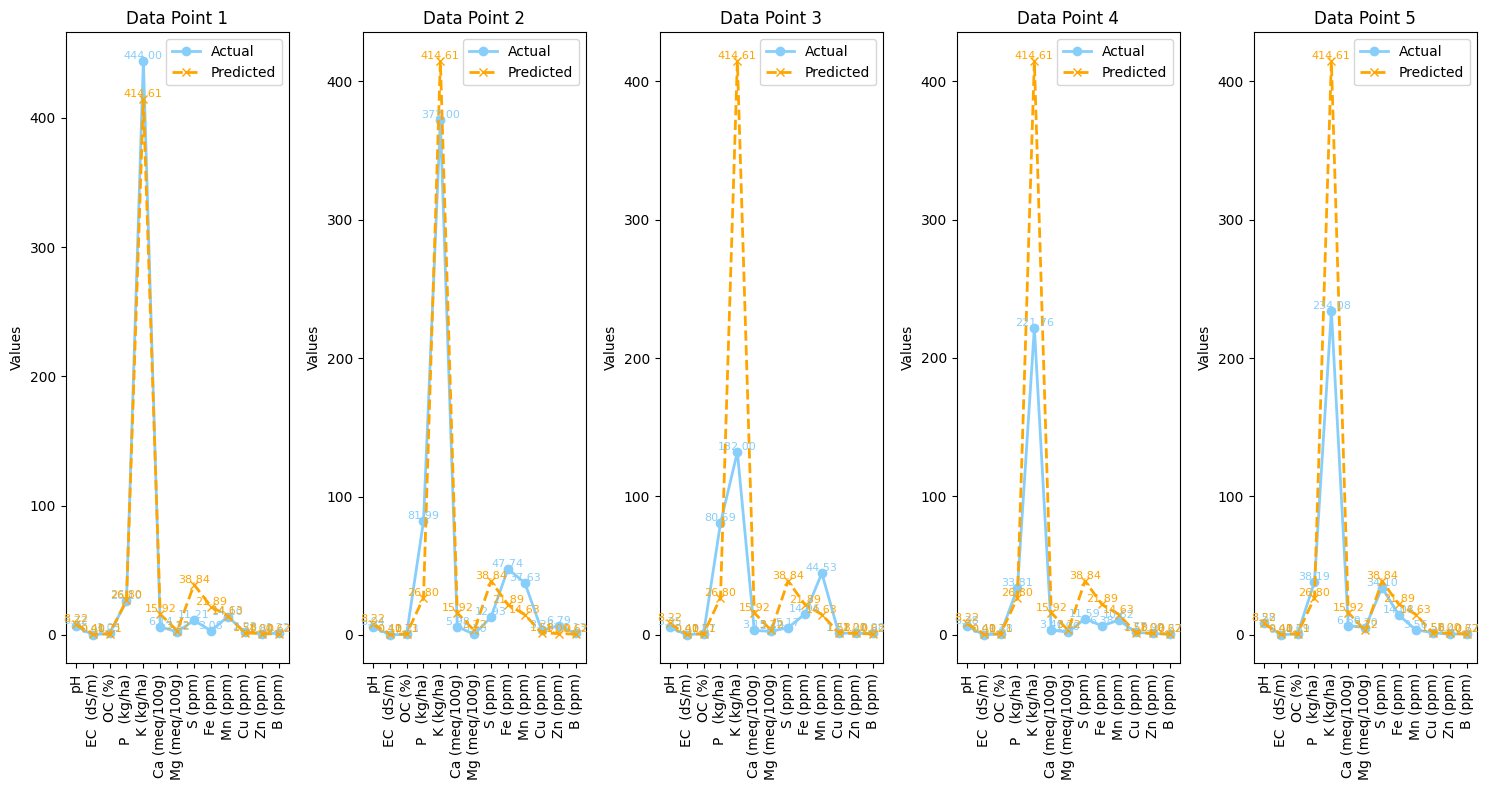

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_adaboost.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    
    # Plot actual and predicted values as line graphs
    plt.plot(actual_df.columns, actual_df.iloc[i], marker='o', label='Actual', color='lightskyblue', linestyle='-', linewidth=2)
    plt.plot(actual_df.columns, predicted_df.iloc[i], marker='x', label='Predicted', color='orange', linestyle='--', linewidth=2)
    
    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each point
    for x, y in zip(actual_df.columns, actual_df.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='lightskyblue')
    for x, y in zip(actual_df.columns, predicted_df.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='orange')

plt.tight_layout()
plt.show()


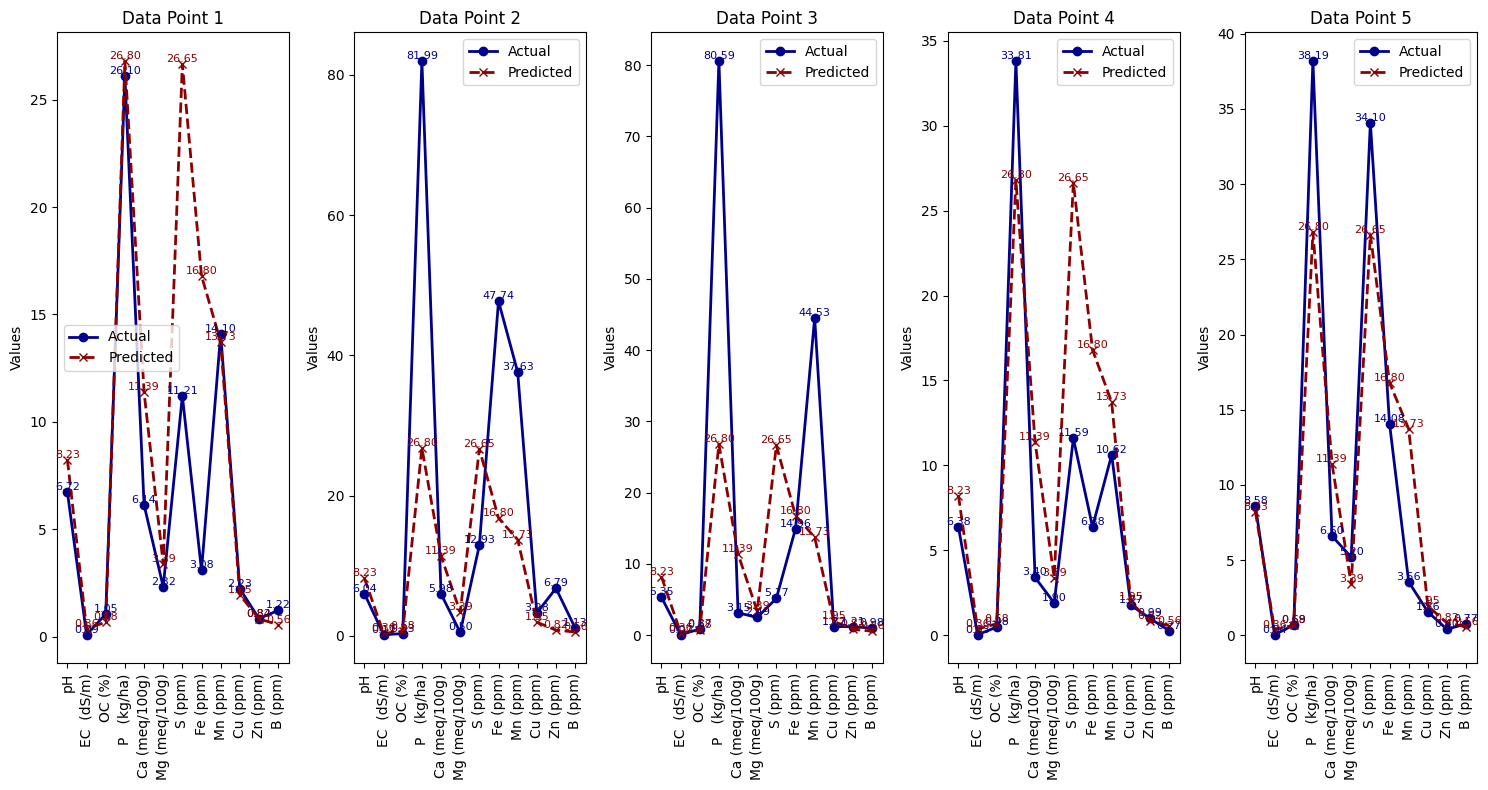

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    336.809904
1    336.809904
2    336.809904
3    336.809904
4    336.809904
Name: K (kg/ha), dtype: float64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = multioutput_adaboost.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)


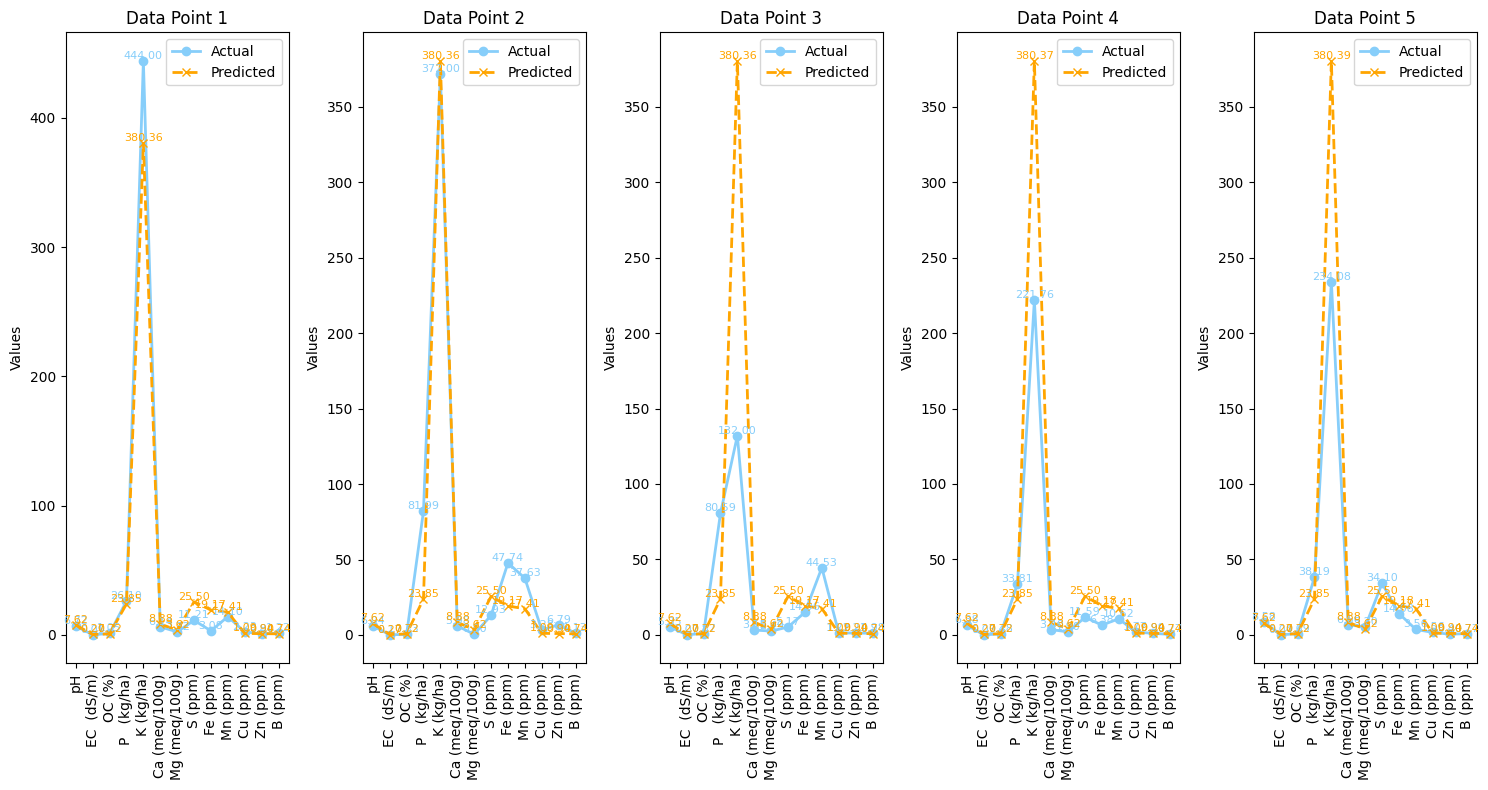

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = best_knn.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)
    
    # Plot actual and predicted values as line graphs
    plt.plot(actual_df.columns, actual_df.iloc[i], marker='o', label='Actual', color='lightskyblue', linestyle='-', linewidth=2)
    plt.plot(actual_df.columns, predicted_df.iloc[i], marker='x', label='Predicted', color='orange', linestyle='--', linewidth=2)
    
    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()
    
    # Add value labels to each point
    for x, y in zip(actual_df.columns, actual_df.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='lightskyblue')
    for x, y in zip(actual_df.columns, predicted_df.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='orange')

plt.tight_layout()
plt.show()


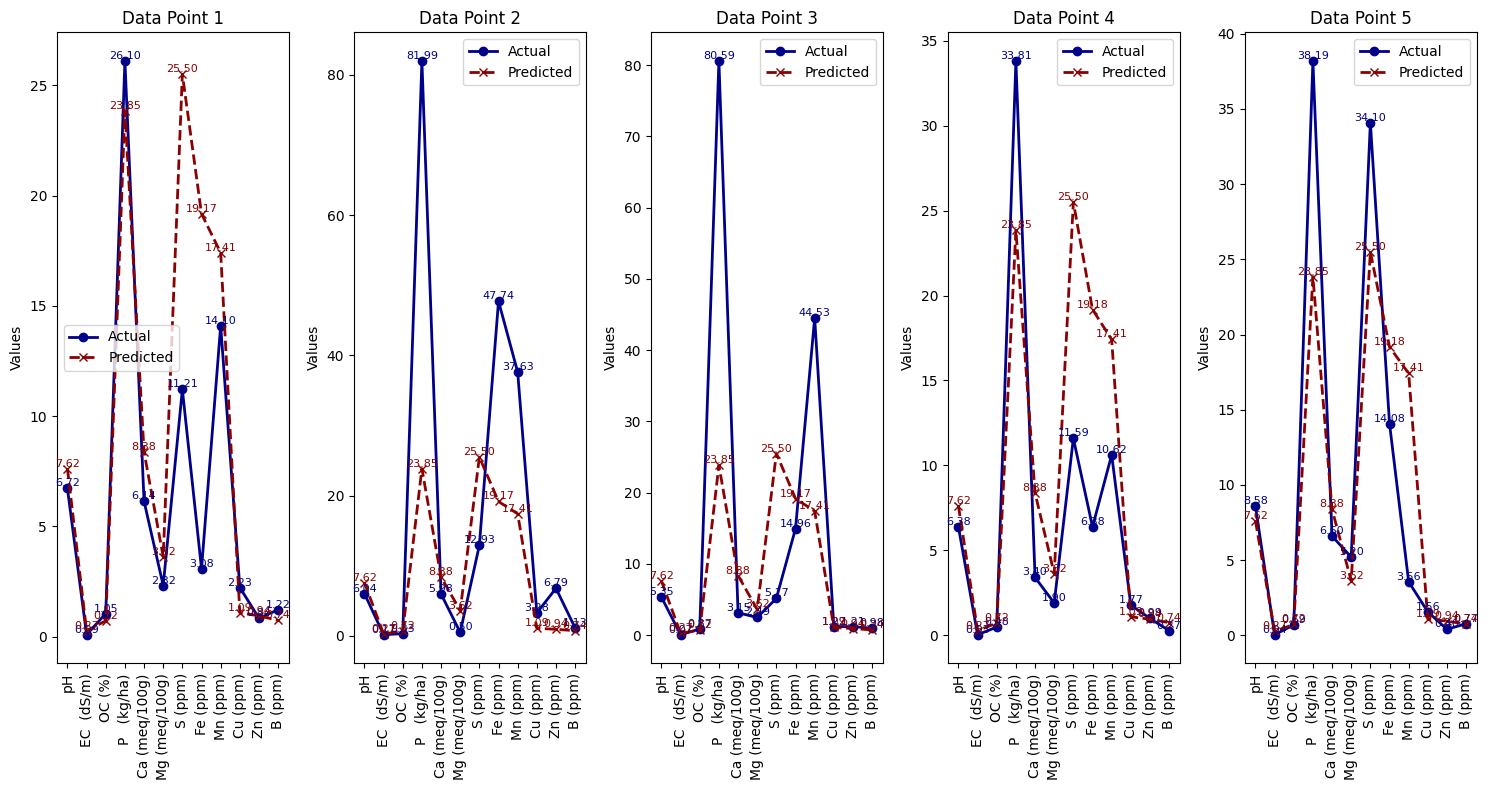

Actual values for 'K (kg/ha)':
0    444.00
1    372.00
2    132.00
3    221.76
4    234.08
Name: K (kg/ha), dtype: float64

Predicted values for 'K (kg/ha)':
0    380.362655
1    380.364277
2    380.359866
3    380.368646
4    380.385198
Name: K (kg/ha), dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data for five data points (rows) with 18 features (columns A to T)
input_data = {
    'A(410)': [2429.58, 1707.9, 1750.41, 2546.68, 3090.54],
    'B(435)': [1108.99, 725.38, 1102.02, 1548.4, 1266.42],
    'C(460)': [2091.93, 1974.49, 2481.05, 2791.56, 2933.88],
    'D(485)': [737.33, 670.81, 816.8, 1007.16, 940.61],
    'E(510)': [835.14, 835.93, 960.65, 1128, 1109.84],
    'F(535)': [1376.82, 1685.28, 1741.43, 1573.73, 2047.64],
    'G(560)': [322.87, 370.31, 430.51, 488.66, 500.91],
    'H(585)': [318.87, 373.6, 437.88, 499.63, 512.7],
    'R(610)': [1305.33, 1335.77, 1206.99, 1338.11, 1482.11],
    'I(645)': [163.26, 185.56, 227.04, 261.84, 267.19],
    'S(680)': [332.58, 321.29, 279.2, 358.34, 354.14],
    'J(705)': [51.68, 60.57, 63.96, 77.51, 76.67],
    'U(760)': [76.56, 68.5, 68.5, 76.56, 75.75],
    'V(810)': [237.65, 241.96, 211.82, 229.04, 259.18],
    'W(860)': [305.23, 275.96, 274.82, 314.24, 306.36],
    'K(900)': [60.67, 82.78, 89.02, 98.09, 108.3],
    'L(940)': [38.34, 43.83, 47.47, 54.78, 55.69],
    'T(730)': [84.07, 76.5, 75.74, 84.07, 85.59]
}

# Actual output values for the five data points
actual_data = [
    [6.72, 0.09, 1.05, 26.1, 444, 6.14, 2.32, 11.21, 3.08, 14.1, 2.23, 0.84, 1.22],
    [6.04, 0.17, 0.33, 81.99, 372, 5.98, 0.5, 12.93, 47.74, 37.63, 3.28, 6.79, 1.13],
    [5.35, 0.07, 0.87, 80.59, 132, 3.15, 2.49, 5.17, 14.96, 44.53, 1.22, 1.21, 0.98],
    [6.38, 0.03, 0.48, 33.81, 221.76, 3.4, 1.9, 11.59, 6.38, 10.62, 1.77, 0.99, 0.27],
    [8.58, 0.04, 0.69, 38.19, 234.08, 6.6, 5.2, 34.1, 14.08, 3.56, 1.56, 0.4, 0.77]
]

# Convert input data and actual outputs to DataFrames
input_df = pd.DataFrame(input_data)
actual_df = pd.DataFrame(actual_data, columns=['pH', 'EC  (dS/m)', 'OC (%)', 'P   (kg/ha)', 'K (kg/ha)', 
                                               'Ca (meq/100g)', 'Mg (meq/100g)', 'S (ppm)', 'Fe (ppm)', 
                                               'Mn (ppm)', 'Cu (ppm)', 'Zn (ppm)', 'B (ppm)'])

# Assuming `scaler` and `multioutput_adaboost` are already defined for scaling and prediction
scaled_input = scaler.transform(input_df)
predictions = best_knn.predict(scaled_input)
predicted_df = pd.DataFrame(predictions, columns=actual_df.columns)

# Exclude "K (kg/ha)" for plotting
columns_to_plot = [col for col in actual_df.columns if col != 'K (kg/ha)']

# Filter out "K (kg/ha)" from actual and predicted data
actual_filtered = actual_df[columns_to_plot]
predicted_filtered = predicted_df[columns_to_plot]

# Plotting actual vs predicted for each data point as line graphs
plt.figure(figsize=(15, 8))
for i in range(len(input_df)):
    plt.subplot(1, 5, i + 1)

    # Plot actual and predicted values as line graphs
    plt.plot(
        columns_to_plot, actual_filtered.iloc[i],
        marker='o', label='Actual', color='darkblue', linestyle='-', linewidth=2
    )
    plt.plot(
        columns_to_plot, predicted_filtered.iloc[i],
        marker='x', label='Predicted', color='darkred', linestyle='--', linewidth=2
    )

    plt.xticks(rotation=90)
    plt.title(f'Data Point {i + 1}')
    plt.ylabel('Values')
    plt.legend()

    # Add value labels to each point
    for x, y in zip(columns_to_plot, actual_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkblue')
    for x, y in zip(columns_to_plot, predicted_filtered.iloc[i]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

actual_k_values = actual_df['K (kg/ha)']
predicted_k_values = predicted_df['K (kg/ha)']

# Print the values
print("Actual values for 'K (kg/ha)':")
print(actual_k_values)

print("\nPredicted values for 'K (kg/ha)':")
print(predicted_k_values)
